In [23]:
import os
directory = "datasets"
files = os.listdir(directory)

In [24]:
import pandas as pd

directory = "datasets"

data = pd.concat(
    [
        pd.read_excel(os.path.join(directory, file)).rename(
            columns=lambda x: x.strip().replace(" ", "_").translate(str.maketrans("", "", r"""!"#$%&'()*+,./:;<=>?@[\]^`{|}~"""))
        )
        for file in os.listdir(directory)
        if file.endswith((".xlsx", ".xls"))
    ],
    ignore_index=True, 
)



In [25]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,665
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573
...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,select,experience gap,\n we are seeking a qualified data engi...,786
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,reject,business acumen,\n we are seeking a qualified product m...,735
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,select,cultural fit,\n we are seeking a qualified ui engine...,913
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,reject,technical knowledge,\n we are seeking a qualified software ...,806


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3174 non-null   object
 1   Name                     3174 non-null   object
 2   Role                     3174 non-null   object
 3   Transcript               3174 non-null   object
 4   Resume                   3174 non-null   object
 5   decision                 3174 non-null   object
 6   Reason_for_decision      3174 non-null   object
 7   Job_Description          3174 non-null   object
 8   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 223.3+ KB


In [27]:
# Checking for missing values
print(data.isnull().sum())

ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason_for_decision        0
Job_Description            0
num_words_in_transcript    0
dtype: int64


In [28]:
# Calculate resume and job description similarity (Cosine Similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job_Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [29]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each transcript
data['sentiment'] = data['Transcript'].apply(lambda transcript: sia.polarity_scores(transcript)['compound'])

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()
print("\nOverall Average Sentiment Score:")
print(f"   - Average Sentiment Score: {average_sentiment:.2f}")

if average_sentiment > 0:
    print("   - The overall sentiment of the transcripts is positive.")
elif average_sentiment < 0:
    print("   - The overall sentiment of the transcripts is negative.")
else:
    print("   - The overall sentiment of the transcripts is neutral.")



Overall Average Sentiment Score:
   - Average Sentiment Score: 1.00
   - The overall sentiment of the transcripts is positive.


In [31]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()


'''Lexical diversity measures the variety of unique words in a text relative to the total number of words. 
'''


'Lexical diversity measures the variety of unique words in a text relative to the total number of words. \n'

In [33]:
# Length of transcript (number of words)
data['transcript_length_words'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length_words'].mean()
min_length = data['transcript_length_words'].min()
max_length = data['transcript_length_words'].max()


In [34]:
# Length of transcript (number of characters)
data['transcript_length_characters'] = data['Transcript'].apply(len)

# Calculate statistics
average_length = data['transcript_length_characters'].mean()
min_length = data['transcript_length_characters'].min()
max_length = data['transcript_length_characters'].max()

In [36]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job_Description']), axis=1)


In [42]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match2'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Transcript']), axis=1)


In [41]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match3'] = data.apply(lambda row: compute_similarity(row['Job_Description'], row['Transcript']), axis=1)


In [44]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [45]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [46]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job_Description'].split())), axis=1)


In [47]:
#Cultural fit sentiment
data['cultural_fit_sentiment'] = data['Reason_for_decision'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [48]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job_Description'], row['Transcript']), axis=1)


In [49]:
#confidence score
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))


In [50]:
#job description complexity
import textstat
data['job_desc_complexity'] = data['Job_Description'].apply(lambda x: textstat.flesch_reading_ease(x))

In [51]:
#interaction quality
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']

In [52]:
#clarity score
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))


In [53]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)


In [55]:
# Encoding the target variable (select/reject)
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select


In [56]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,resume_jd_similarity,...,resume_length,job_description_experience_match,cultural_fit_sentiment,job_fit_score,confidence_score,job_desc_complexity,interaction_quality,clarity_score,text_complexity_transcript,text_complexity_resume
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,0,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528,0.552990,...,390,56,0.000000,0.087189,6,-29.97,526.6800,68.87,1.960432,1.511628
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",1,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804,0.345283,...,386,27,0.000000,0.256098,1,30.91,803.6784,53.71,2.098734,1.473282
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",0,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503,0.666840,...,445,78,0.000000,0.094828,3,16.76,501.0886,75.91,1.853047,1.642066
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",1,Strong cultural fit.,Here is a sample job description for a Softwar...,665,0.533122,...,371,54,0.311111,0.158436,0,-55.55,663.8030,57.27,2.160883,1.565401
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,0,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573,0.597536,...,386,57,0.400000,0.082892,4,-40.53,570.4788,65.32,2.122302,1.642553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,1,experience gap,\n we are seeking a qualified data engi...,786,0.337360,...,344,12,0.000000,0.428571,0,28.33,784.9782,66.44,2.153425,1.965714
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,0,business acumen,\n we are seeking a qualified product m...,735,0.324334,...,358,12,0.000000,0.567568,0,27.32,734.4120,53.71,2.130435,2.251572
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,1,cultural fit,\n we are seeking a qualified ui engine...,913,0.351762,...,347,16,0.250000,0.500000,0,18.35,912.6348,65.22,2.243243,1.816754
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,0,technical knowledge,\n we are seeking a qualified software ...,806,0.254393,...,268,14,0.000000,0.527778,0,27.83,804.8716,56.35,2.137931,1.558140


In [61]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description', 'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'soft_skills_sentiment', 'resume_length',
       'job_description_experience_match', 'cultural_fit_sentiment',
       'job_fit_score', 'confidence_score', 'job_desc_complexity',
       'interaction_quality', 'clarity_score', 'text_complexity_transcript',
       'text_complexity_resume'],
      dtype='object')

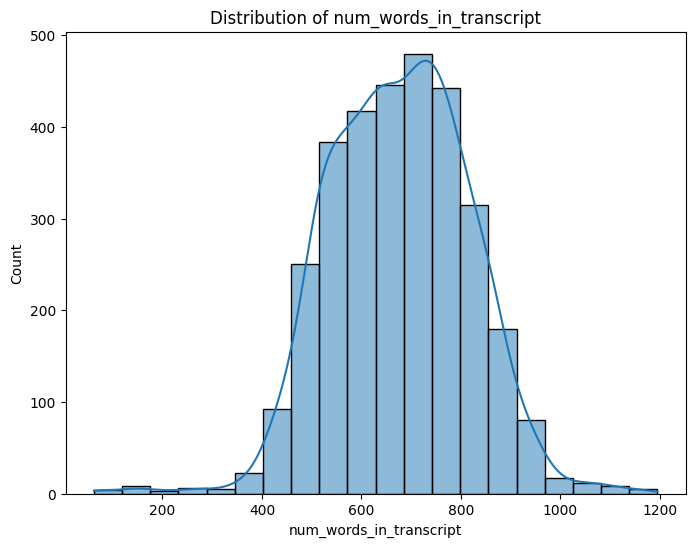

--- Summary of num_words_in_transcript Distribution ---
   - Mean: 676.58
   - Median: 679.00
   - Standard Deviation: 139.51
   - The distribution of num_words_in_transcript is negatively skewed.
   - num_words_in_transcript appears to have a skewed distribution.
   ----------------------------------------------------



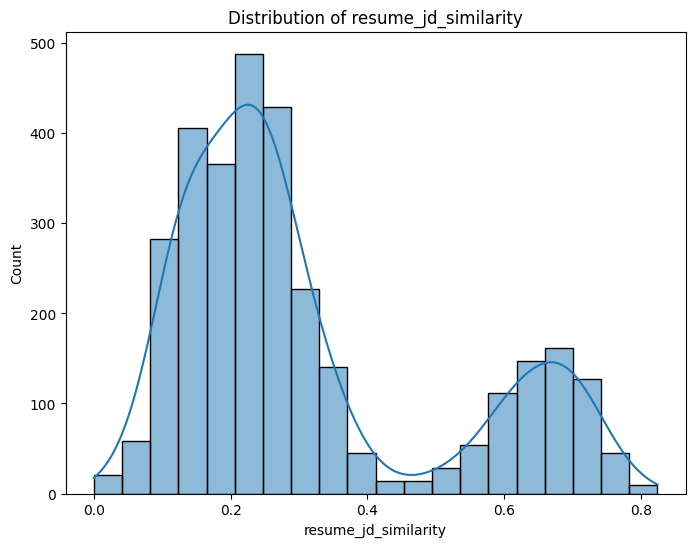

--- Summary of resume_jd_similarity Distribution ---
   - Mean: 0.31
   - Median: 0.24
   - Standard Deviation: 0.20
   - The distribution of resume_jd_similarity is positively skewed.
   - resume_jd_similarity appears to have a normal distribution.
   ----------------------------------------------------



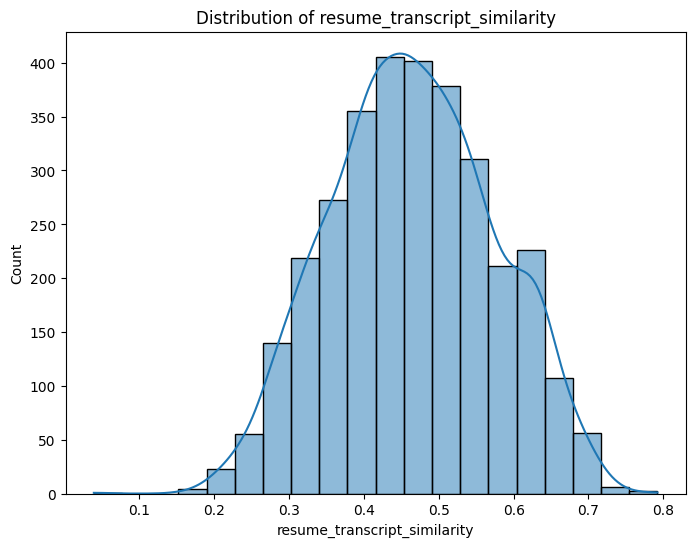

--- Summary of resume_transcript_similarity Distribution ---
   - Mean: 0.47
   - Median: 0.46
   - Standard Deviation: 0.11
   - The distribution of resume_transcript_similarity is positively skewed.
   - resume_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



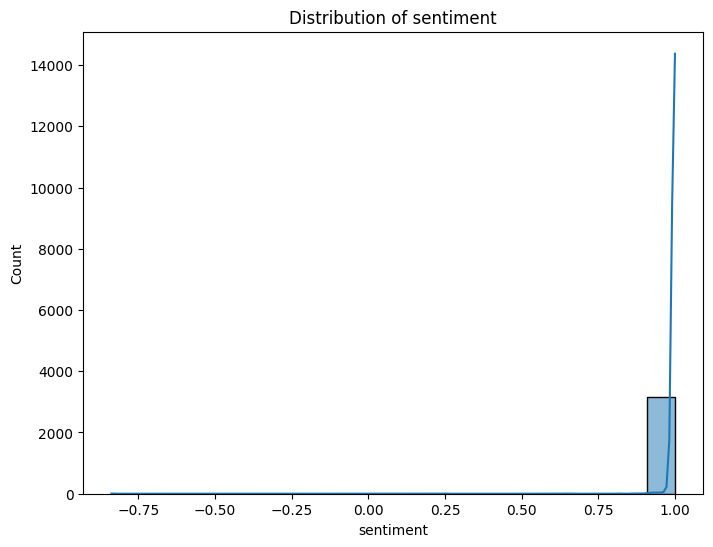

--- Summary of sentiment Distribution ---
   - Mean: 1.00
   - Median: 1.00
   - Standard Deviation: 0.04
   - The distribution of sentiment is negatively skewed.
   - sentiment appears to have a normal distribution.
   ----------------------------------------------------



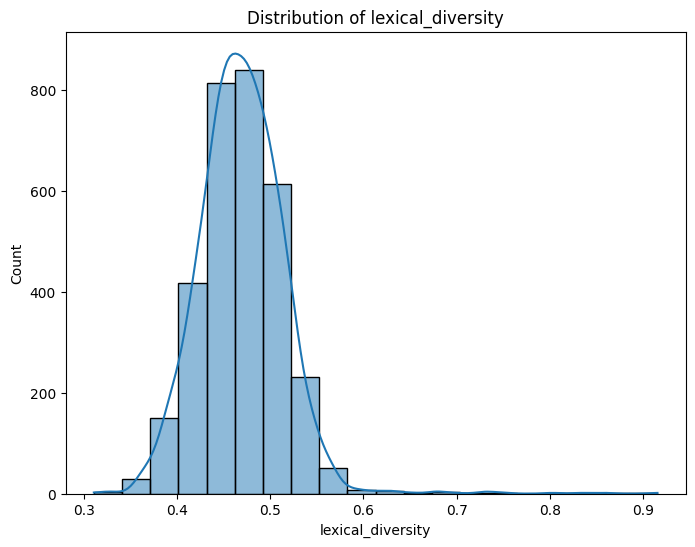

--- Summary of lexical_diversity Distribution ---
   - Mean: 0.47
   - Median: 0.47
   - Standard Deviation: 0.05
   - The distribution of lexical_diversity is positively skewed.
   - lexical_diversity appears to have a normal distribution.
   ----------------------------------------------------



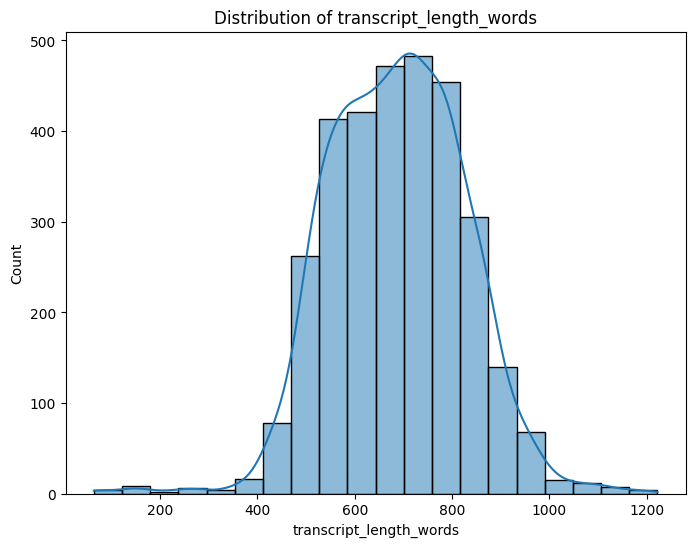

--- Summary of transcript_length_words Distribution ---
   - Mean: 687.27
   - Median: 688.00
   - Standard Deviation: 138.39
   - The distribution of transcript_length_words is negatively skewed.
   - transcript_length_words appears to have a skewed distribution.
   ----------------------------------------------------



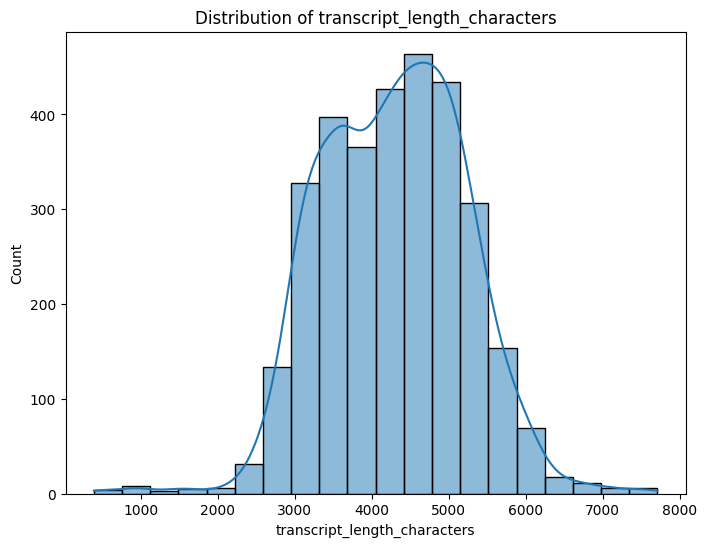

--- Summary of transcript_length_characters Distribution ---
   - Mean: 4286.39
   - Median: 4310.00
   - Standard Deviation: 926.49
   - The distribution of transcript_length_characters is negatively skewed.
   - transcript_length_characters appears to have a skewed distribution.
   ----------------------------------------------------



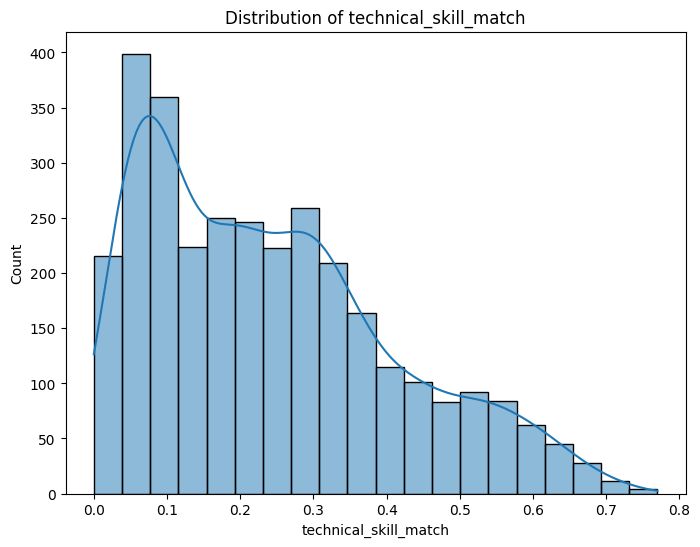

--- Summary of technical_skill_match Distribution ---
   - Mean: 0.24
   - Median: 0.21
   - Standard Deviation: 0.17
   - The distribution of technical_skill_match is positively skewed.
   - technical_skill_match appears to have a normal distribution.
   ----------------------------------------------------



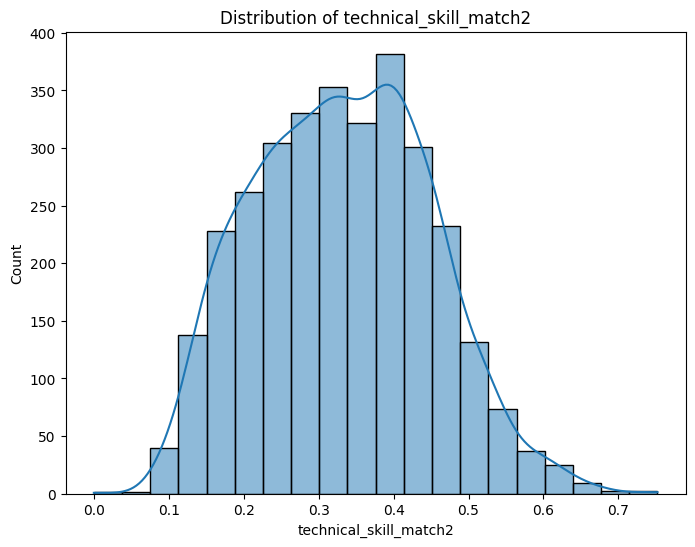

--- Summary of technical_skill_match2 Distribution ---
   - Mean: 0.33
   - Median: 0.33
   - Standard Deviation: 0.12
   - The distribution of technical_skill_match2 is positively skewed.
   - technical_skill_match2 appears to have a normal distribution.
   ----------------------------------------------------



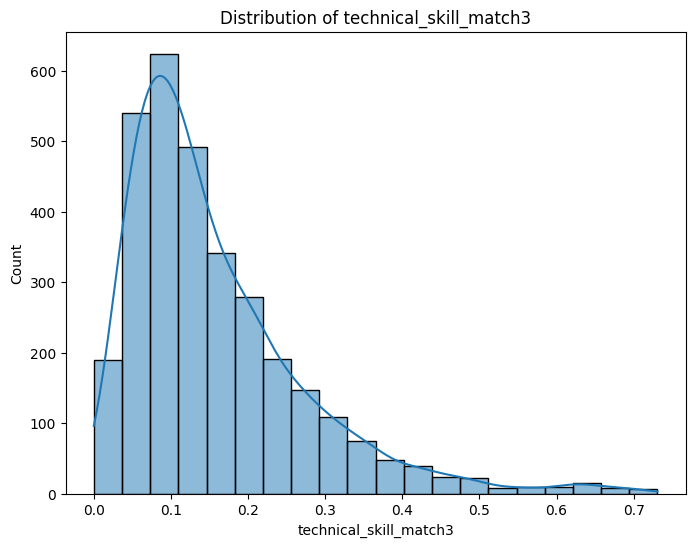

--- Summary of technical_skill_match3 Distribution ---
   - Mean: 0.16
   - Median: 0.12
   - Standard Deviation: 0.12
   - The distribution of technical_skill_match3 is positively skewed.
   - technical_skill_match3 appears to have a normal distribution.
   ----------------------------------------------------



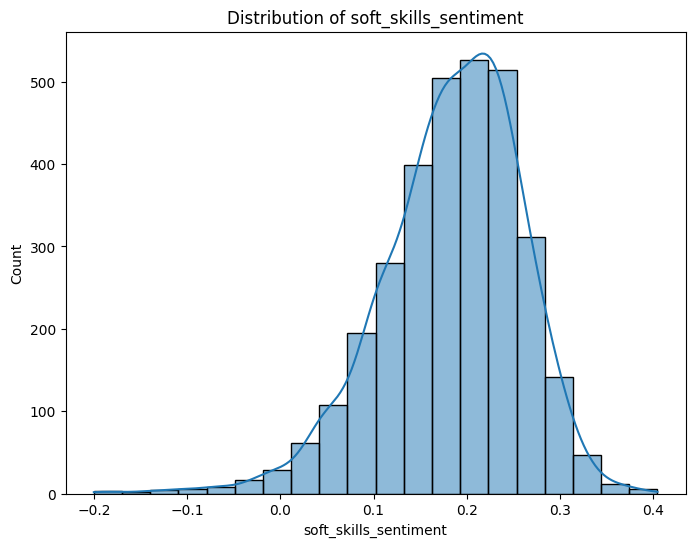

--- Summary of soft_skills_sentiment Distribution ---
   - Mean: 0.18
   - Median: 0.19
   - Standard Deviation: 0.08
   - The distribution of soft_skills_sentiment is negatively skewed.
   - soft_skills_sentiment appears to have a normal distribution.
   ----------------------------------------------------



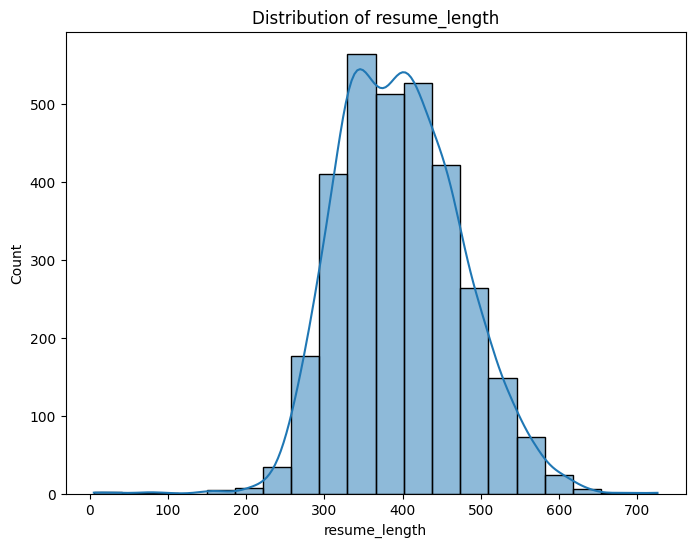

--- Summary of resume_length Distribution ---
   - Mean: 396.74
   - Median: 393.00
   - Standard Deviation: 77.06
   - The distribution of resume_length is positively skewed.
   - resume_length appears to have a skewed distribution.
   ----------------------------------------------------



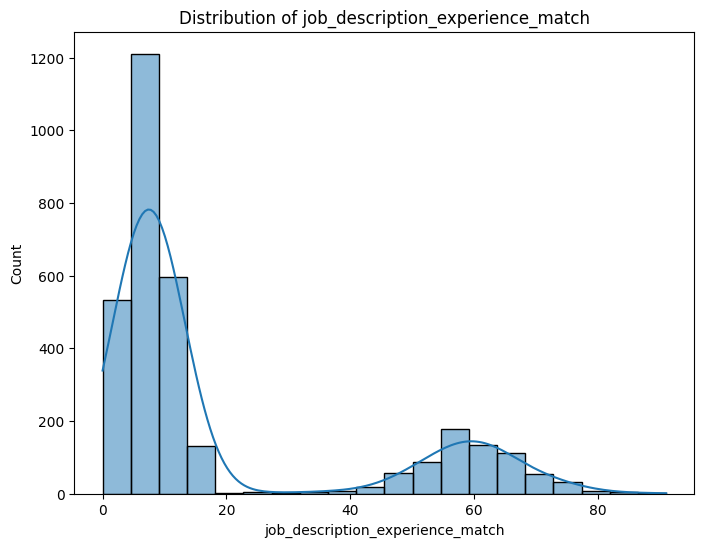

--- Summary of job_description_experience_match Distribution ---
   - Mean: 18.94
   - Median: 9.00
   - Standard Deviation: 22.12
   - The distribution of job_description_experience_match is positively skewed.
   - job_description_experience_match appears to have a skewed distribution.
   ----------------------------------------------------



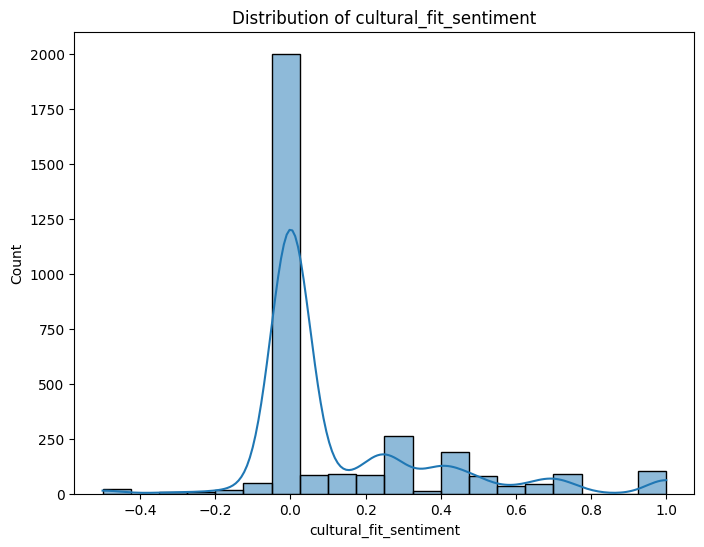

--- Summary of cultural_fit_sentiment Distribution ---
   - Mean: 0.13
   - Median: 0.00
   - Standard Deviation: 0.26
   - The distribution of cultural_fit_sentiment is positively skewed.
   - cultural_fit_sentiment appears to have a skewed distribution.
   ----------------------------------------------------



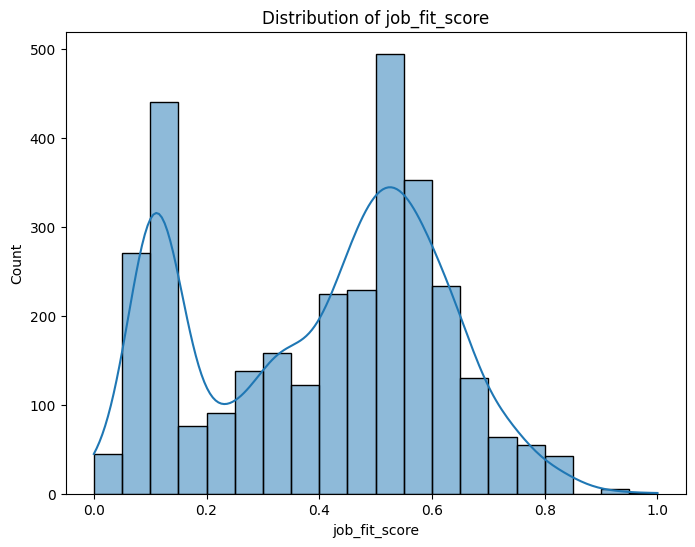

--- Summary of job_fit_score Distribution ---
   - Mean: 0.40
   - Median: 0.45
   - Standard Deviation: 0.21
   - The distribution of job_fit_score is negatively skewed.
   - job_fit_score appears to have a normal distribution.
   ----------------------------------------------------



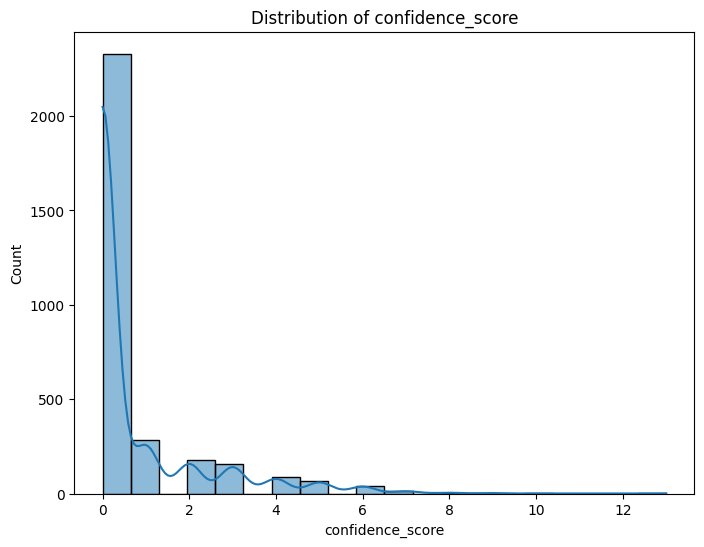

--- Summary of confidence_score Distribution ---
   - Mean: 0.71
   - Median: 0.00
   - Standard Deviation: 1.48
   - The distribution of confidence_score is positively skewed.
   - confidence_score appears to have a skewed distribution.
   ----------------------------------------------------



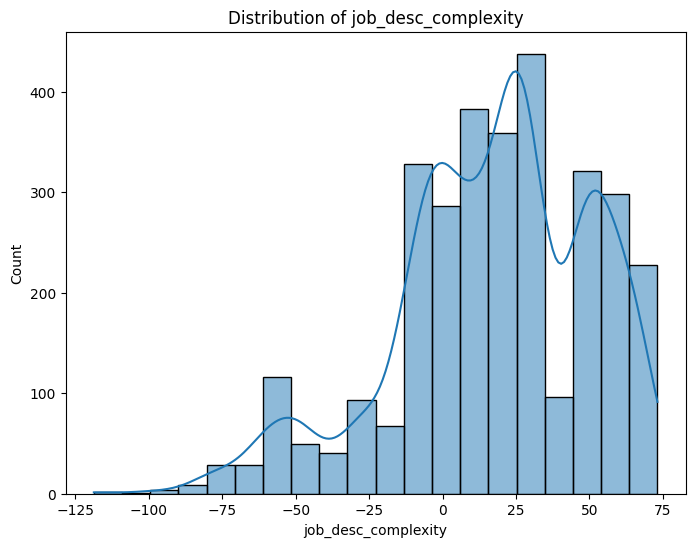

--- Summary of job_desc_complexity Distribution ---
   - Mean: 16.79
   - Median: 22.11
   - Standard Deviation: 33.63
   - The distribution of job_desc_complexity is negatively skewed.
   - job_desc_complexity appears to have a skewed distribution.
   ----------------------------------------------------



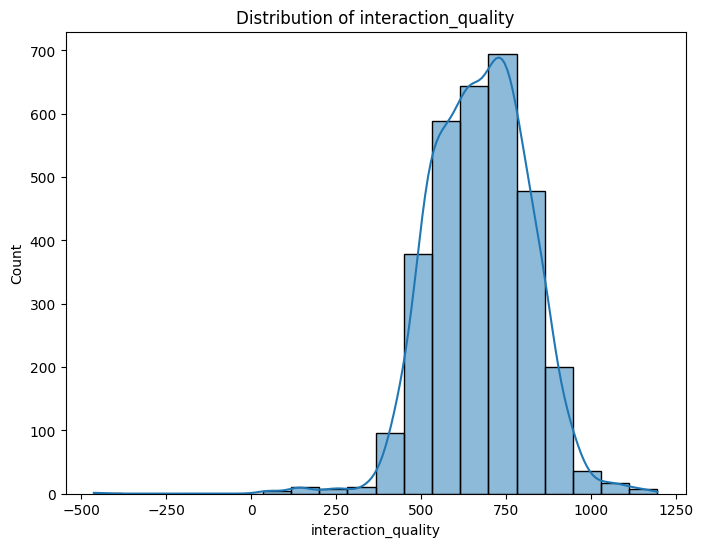

--- Summary of interaction_quality Distribution ---
   - Mean: 674.36
   - Median: 677.01
   - Standard Deviation: 142.24
   - The distribution of interaction_quality is negatively skewed.
   - interaction_quality appears to have a skewed distribution.
   ----------------------------------------------------



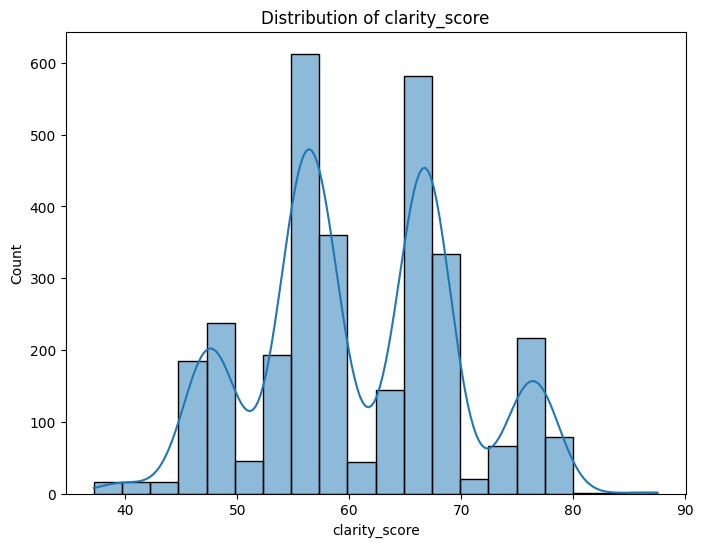

--- Summary of clarity_score Distribution ---
   - Mean: 60.76
   - Median: 58.69
   - Standard Deviation: 8.96
   - The distribution of clarity_score is positively skewed.
   - clarity_score appears to have a skewed distribution.
   ----------------------------------------------------



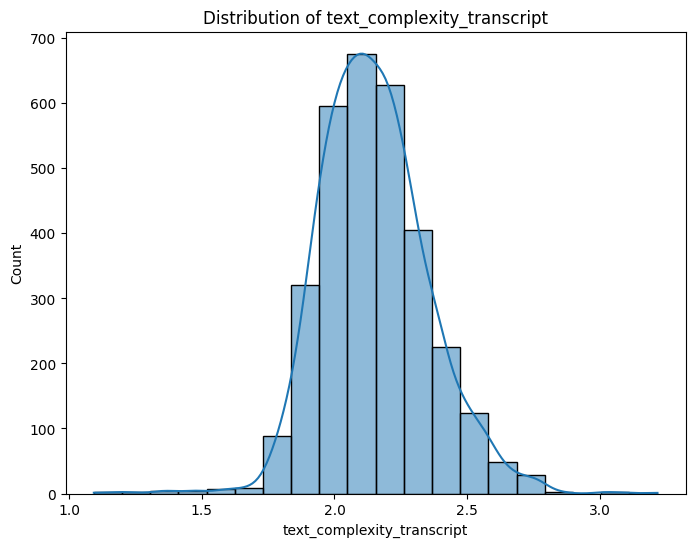

--- Summary of text_complexity_transcript Distribution ---
   - Mean: 2.15
   - Median: 2.13
   - Standard Deviation: 0.20
   - The distribution of text_complexity_transcript is positively skewed.
   - text_complexity_transcript appears to have a normal distribution.
   ----------------------------------------------------



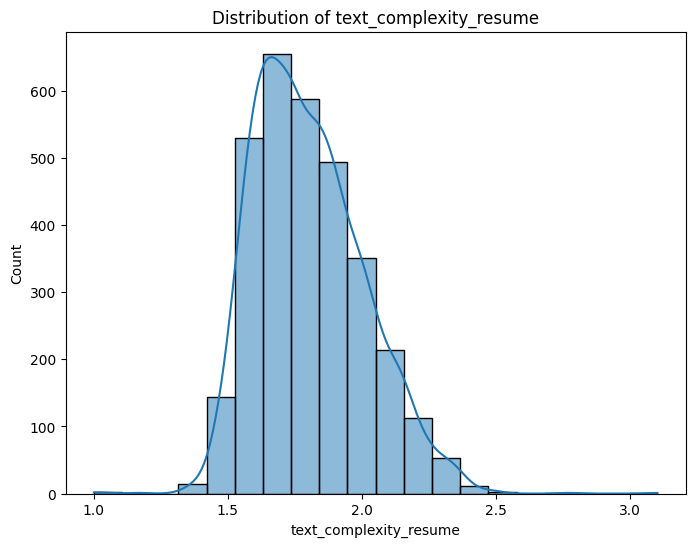

--- Summary of text_complexity_resume Distribution ---
   - Mean: 1.80
   - Median: 1.77
   - Standard Deviation: 0.20
   - The distribution of text_complexity_resume is positively skewed.
   - text_complexity_resume appears to have a normal distribution.
   ----------------------------------------------------



In [62]:
# List of numerical features to analyze
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = ['num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'soft_skills_sentiment', 'resume_length',
       'job_description_experience_match', 'cultural_fit_sentiment',
       'job_fit_score', 'confidence_score', 'job_desc_complexity',
       'interaction_quality', 'clarity_score', 'text_complexity_transcript',
       'text_complexity_resume']

# Loop through each feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=20)  # Create histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Summary of the plot
    print(f"--- Summary of {feature} Distribution ---")
    # Analyze the feature's distribution
    feature_data = data[feature]
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    std_value = feature_data.std()
    
    print(f"   - Mean: {mean_value:.2f}")
    print(f"   - Median: {median_value:.2f}")
    print(f"   - Standard Deviation: {std_value:.2f}")
    
    # Insights based on distribution (adjust based on the feature type)
    if mean_value > median_value:
        print(f"   - The distribution of {feature} is positively skewed.")
    elif mean_value < median_value:
        print(f"   - The distribution of {feature} is negatively skewed.")
    else:
        print(f"   - The distribution of {feature} is symmetric.")
    
    print(f"   - {feature} appears to have a {'normal' if abs(mean_value - median_value) < 0.1 else 'skewed'} distribution.")
    print("   ----------------------------------------------------\n")


In [64]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'soft_skills_sentiment', 'resume_length',
       'job_description_experience_match', 'cultural_fit_sentiment',
       'job_fit_score', 'confidence_score', 'job_desc_complexity',
       'interaction_quality', 'clarity_score', 'text_complexity_transcript',
       'text_complexity_resume']
]

y = data['decision']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 88.35%


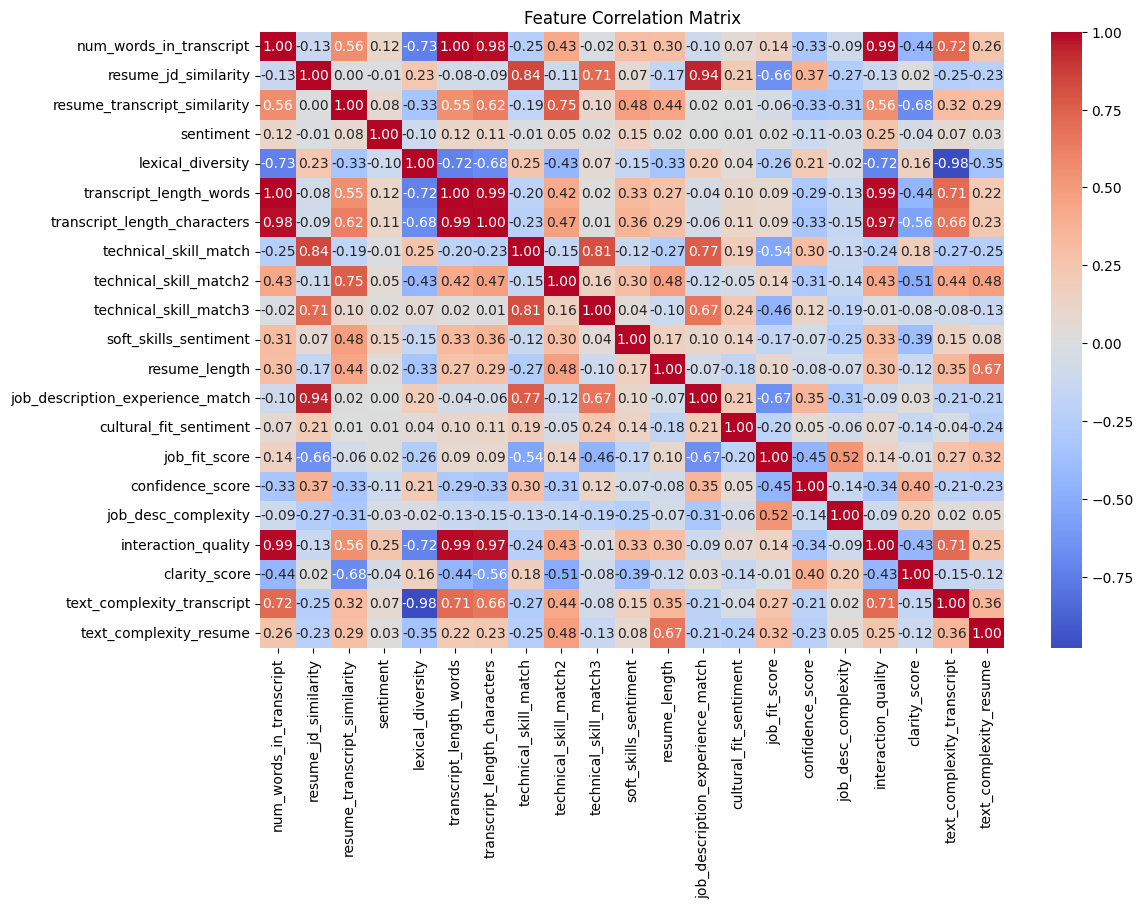

In [70]:
# Calculate the correlation matrix
corr_matrix = X.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

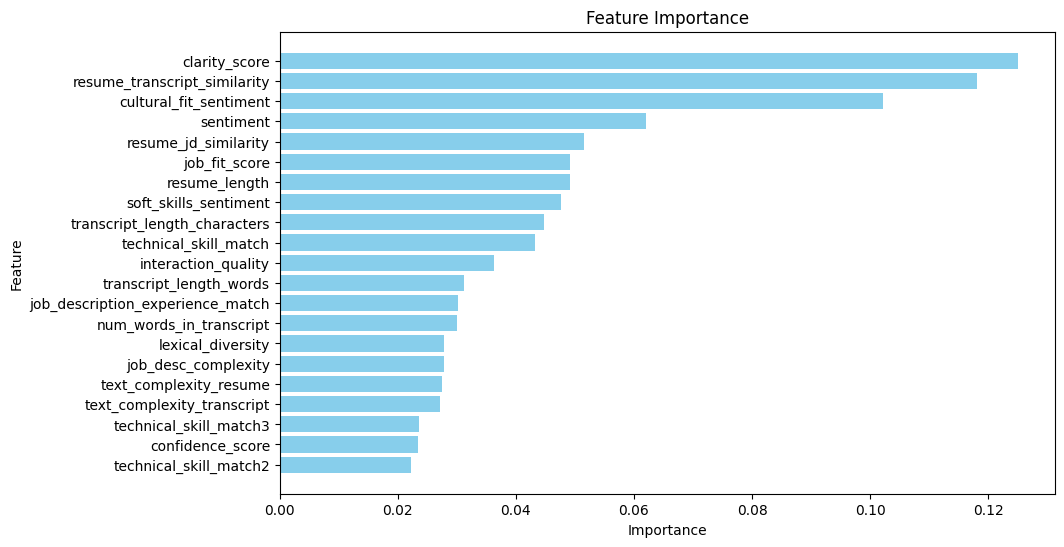


--- Feature Importance Summary ---
Top 5 most important features:
                         Feature  Importance
18                 clarity_score    0.125039
2   resume_transcript_similarity    0.118048
13        cultural_fit_sentiment    0.102131
3                      sentiment    0.062057
1           resume_jd_similarity    0.051509

Bottom 5 least important features:
                       Feature  Importance
20      text_complexity_resume    0.027531
19  text_complexity_transcript    0.027180
9       technical_skill_match3    0.023534
15            confidence_score    0.023428
8       technical_skill_match2    0.022286


In [72]:
# Get the feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Sort the features based on their importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Summary of the plot
# Display the top 5 most and least important features
print("\n--- Feature Importance Summary ---")
top_5_features = feature_importances.head(5)
bottom_5_features = feature_importances.tail(5)

print("Top 5 most important features:")
print(top_5_features[['Feature', 'Importance']])

print("\nBottom 5 least important features:")
print(bottom_5_features[['Feature', 'Importance']])


In [74]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc

# Add a constant to the features for the intercept term
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_const).fit()

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_const)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output performance
print(f"\nLogistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Logistic Regression AUC: {log_reg_roc_auc:.4f}")


Optimization terminated successfully.
         Current function value: 0.345778
         Iterations 9

Logistic Regression Accuracy: 81.57%
Logistic Regression AUC: 0.9078


In [139]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']  # Flag errors

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error']]
total_misclassified = f"misclassified instances: {misclassified_count}"
print(total_misclassified) # Display the first few misclassified instances



misclassified instances: 117


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Fit the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Calculate feature importance based on coefficients
lin_reg_feature_importance = abs(lin_reg_model.coef_)  # Use absolute values of coefficients
lin_reg_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lin_reg_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Linear Regression):")
lin_reg_impact_analysis


Impact Analysis (Linear Regression):


,Feature,Importance
2,resume_transcript_similarity,1.548234
1,resume_jd_similarity,1.255077
8,technical_skill_match2,0.789855
3,sentiment,0.787715
13,cultural_fit_sentiment,0.591146
19,text_complexity_transcript,0.579236
4,lexical_diversity,0.364903
14,job_fit_score,0.282802
10,soft_skills_sentiment,0.282583
7,technical_skill_match,0.095114


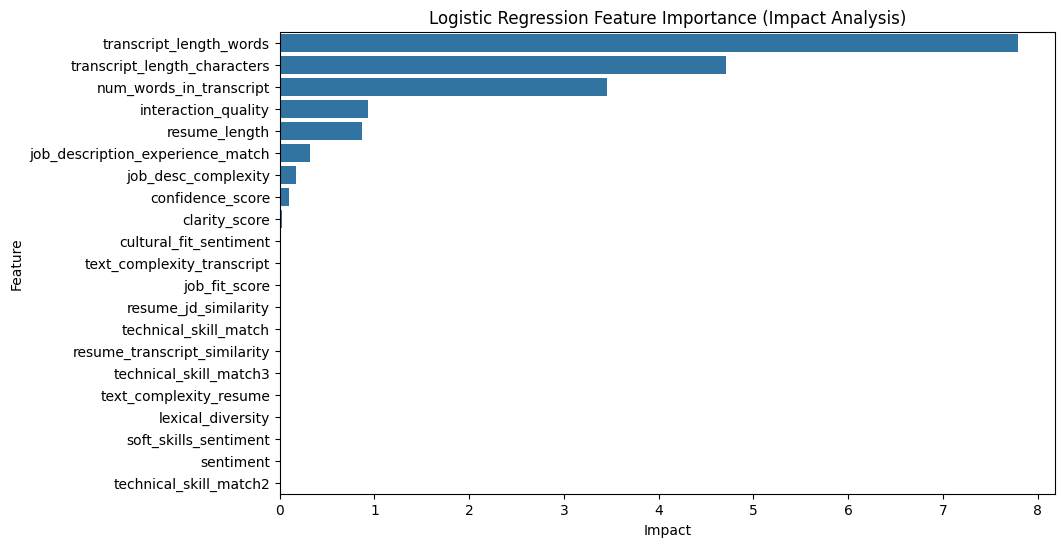


Top 5 most impactful features:
transcript_length_words: Coefficient = -0.0558, Impact = 7.7924
transcript_length_characters: Coefficient = 0.0050, Impact = 4.7154
num_words_in_transcript: Coefficient = 0.0246, Impact = 3.4586
interaction_quality: Coefficient = 0.0065, Impact = 0.9347
resume_length: Coefficient = -0.0111, Impact = 0.8644


In [90]:
# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Feature', data=coefficients_sorted)
plt.title('Logistic Regression Feature Importance (Impact Analysis)')
plt.xlabel('Impact')
plt.ylabel('Feature')
plt.show()

# --- Summary ---
top_features = coefficients_sorted.head(5)  # Top 5 features by impact

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: Coefficient = {row['Coefficient']:.4f}, Impact = {row['Impact']:.4f}")

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',  # Change to 'roc_auc' if optimizing for AUC in binary classification
    verbose=1,  # Optional: Add verbosity to monitor progress
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

# For binary classification: Predict probabilities for ROC AUC calculation
if len(set(y_test)) == 2:  # Binary classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])
else:  # Multi-class classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test), multi_class='ovr')

dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Display results
print(f"Decision Tree Accuracy: {dt_accuracy* 100:.2f}")
print(f"Decision Tree ROC AUC: {dt_roc_auc:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree Accuracy: 85.35
Decision Tree ROC AUC: 0.9157


In [135]:
# --- Error Analysis ---
dt_errors = X_test.copy() 
dt_errors['True Label'] = y_test  
dt_errors['Predicted Label'] = dt_best.predict(X_test)  
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label'] 

# Extract misclassified samples
misclassified_dt = dt_errors[dt_errors['Error'] == True]

# Display the first few misclassified instances
print("Misclassified Instances:",len(misclassified_dt))

Misclassified Instances: 93


In [102]:
# --- Impact Analysis (Decision Tree) ---
dt_feature_importance = dt_best.feature_importances_  # Extract feature importances
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Displaying feature importance
print("Impact Analysis (Decision Tree):")
dt_impact_analysis



Impact Analysis (Decision Tree):


,Feature,Importance
18,clarity_score,0.341698
13,cultural_fit_sentiment,0.166293
2,resume_transcript_similarity,0.097164
14,job_fit_score,0.060989
11,resume_length,0.048632
15,confidence_score,0.044858
16,job_desc_complexity,0.042881
12,job_description_experience_match,0.037471
3,sentiment,0.035599
6,transcript_length_characters,0.030279


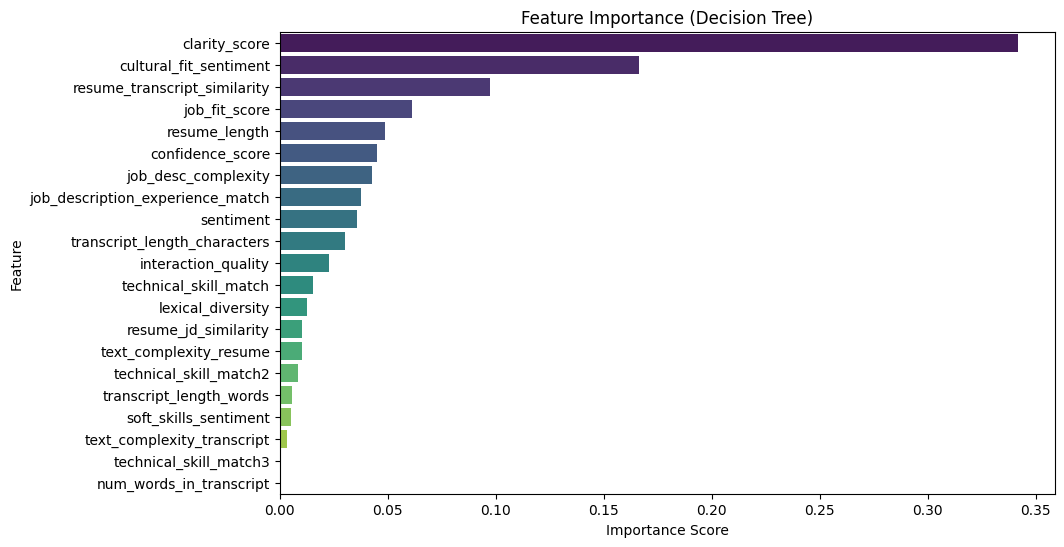


Top 5 most impactful features:
clarity_score: Importance = 0.3417
cultural_fit_sentiment: Importance = 0.1663
resume_transcript_similarity: Importance = 0.0972
job_fit_score: Importance = 0.0610
resume_length: Importance = 0.0486


In [107]:
# Select the top 5 most impactful features
top_dt_features = dt_impact_analysis.head(5)

# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=dt_impact_analysis,
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.legend([], [], frameon=False)  # Remove legend for cleaner output
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# --- Summary ---
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Reduced grid for faster search
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest with parallel processing
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
print("Starting Random Forest Grid Search...")
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1)  # Using 'roc_auc' as the scoring metric
grid_search.fit(X_train, y_train)

# Best model from GridSearch
rf_best = grid_search.best_estimator_

# Predictions on test set
rf_y_pred = rf_best.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Display results
print(f"Random Forest Accuracy: {rf_accuracy*100:.4f}")
if rf_roc_auc is not None:
    print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")


Starting Random Forest Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest Accuracy: 88.0315
Random Forest ROC-AUC: 0.9651


In [131]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Check if there are any misclassified instances
if not rf_errors['Error'].any():
    print("No misclassified instances found in the test set.")
else:
    # Display the first few misclassified instances
    misclassified_rf = rf_errors[rf_errors['Error'] == True]
    print(f"Total Misclassified Instances: {len(misclassified_rf)}")


Total Misclassified Instances: 76


In [130]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying the top 10 most impactful features
print("Impact Analysis (Random Forest):")
rf_impact_analysis

Impact Analysis (Random Forest):


,Feature,Importance
18,clarity_score,0.135291
2,resume_transcript_similarity,0.127973
13,cultural_fit_sentiment,0.106015
3,sentiment,0.059694
11,resume_length,0.055804
6,transcript_length_characters,0.052467
1,resume_jd_similarity,0.049285
10,soft_skills_sentiment,0.047869
14,job_fit_score,0.046729
7,technical_skill_match,0.038698


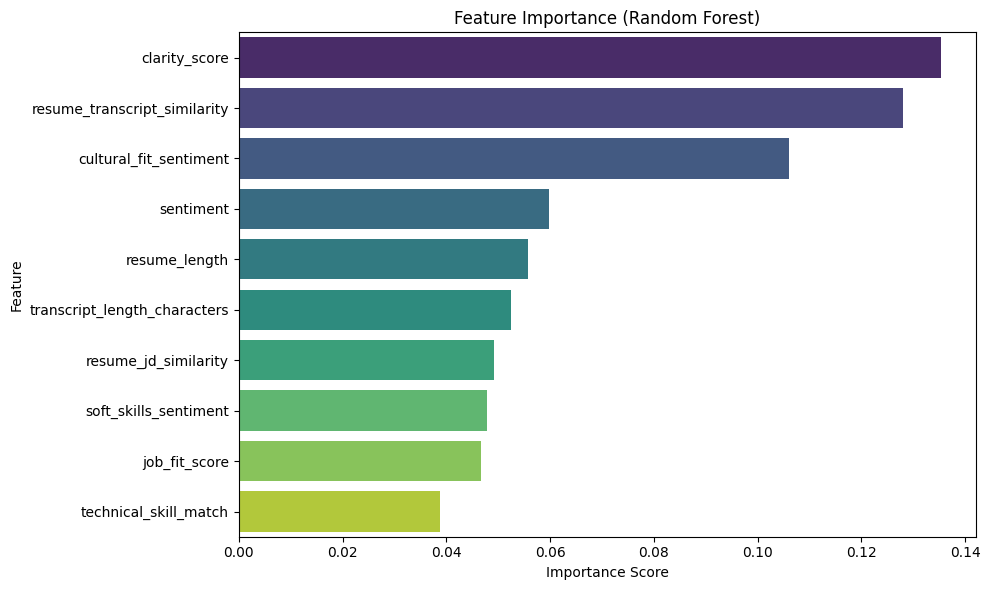

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=rf_impact_analysis.head(10), 
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [119]:
#XGBoost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],   # Step size shrinkage
    'n_estimators': [50, 100, 150]       # Number of boosting rounds
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
xgb_best = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
xgb_y_pred = xgb_best.predict(X_test)
xgb_y_pred_prob = xgb_best.predict_proba(X_test)[:, 1]

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob)

# Display the results
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(f"XGBoost ROC AUC: {xgb_roc_auc:.4f}")

XGBoost Accuracy: 88.82%
XGBoost ROC AUC: 0.9678


In [127]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error']]
print(f"Misclassified Instances:{len(misclassified_xgb)}")


Misclassified Instances:71


In [129]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(
    list(xgb_feature_importance.items()), columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
xgb_impact_analysis


Impact Analysis (XGBoost):


,Feature,Importance
2,resume_transcript_similarity,163.0
18,clarity_score,149.0
13,cultural_fit_sentiment,149.0
11,resume_length,144.0
1,resume_jd_similarity,142.0
10,soft_skills_sentiment,133.0
14,job_fit_score,128.0
3,sentiment,108.0
7,technical_skill_match,95.0
6,transcript_length_characters,82.0


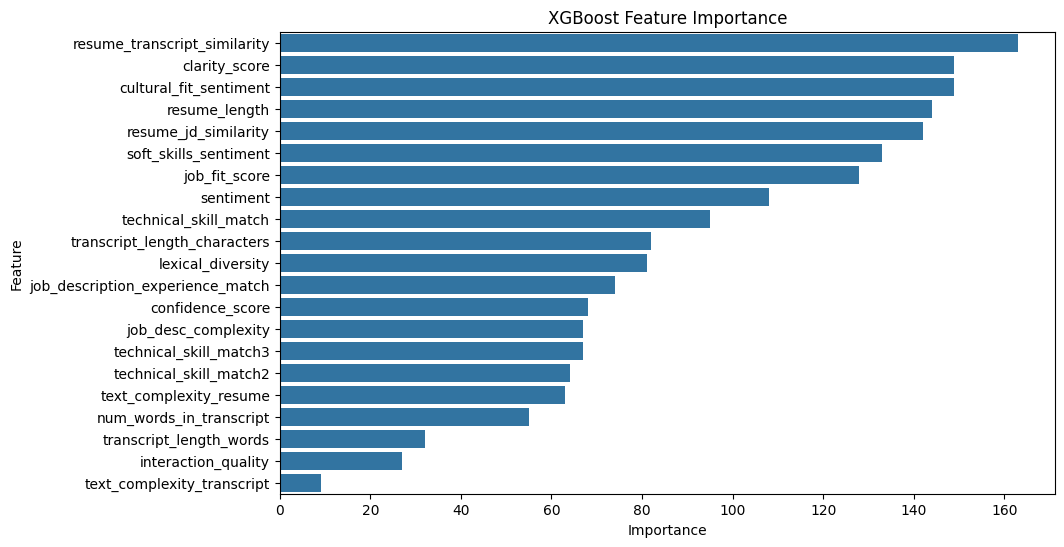

Top 5 most impactful features:
resume_transcript_similarity: Importance = 163.0000
clarity_score: Importance = 149.0000
cultural_fit_sentiment: Importance = 149.0000
resume_length: Importance = 144.0000
resume_jd_similarity: Importance = 142.0000


In [140]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

print("Top 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [141]:
# --- Gradient Boosting Classifier ---
from sklearn.ensemble import GradientBoostingClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Initialize and fit the model using GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and predictions
gb_best = grid_search.best_estimator_
gb_y_pred = gb_best.predict(X_test)

# Evaluation metrics
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])

# Display results
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Gradient Boosting ROC AUC: {gb_roc_auc:.4f}")

Gradient Boosting Accuracy: 88.03%
Gradient Boosting ROC AUC: 0.9640


In [145]:
# --- Error Analysis for Gradient Boosting ---
gb_errors = X_test.copy()
gb_errors['True Label'] = y_test
gb_errors['Predicted Label'] = gb_y_pred  # Use predictions from Gradient Boosting
gb_errors['Error'] = gb_errors['True Label'] != gb_errors['Predicted Label']

# Extracting misclassified instances
misclassified_gb = gb_errors[gb_errors['Error']]
print(f"Misclassified Instances: {len(misclassified_gb)}")


Misclassified Instances: 76


In [147]:
# --- Impact Analysis for Gradient Boosting ---
gb_feature_importance = gb_best.feature_importances_
gb_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the impact analysis
print("Impact Analysis (Gradient Boosting):")
gb_impact_analysis


Impact Analysis (Gradient Boosting):


,Feature,Importance
0,clarity_score,0.271532
1,cultural_fit_sentiment,0.185445
2,resume_transcript_similarity,0.129334
3,resume_length,0.053128
4,job_fit_score,0.050474
5,confidence_score,0.047634
6,resume_jd_similarity,0.034086
7,sentiment,0.032704
8,soft_skills_sentiment,0.031078
9,job_description_experience_match,0.022673


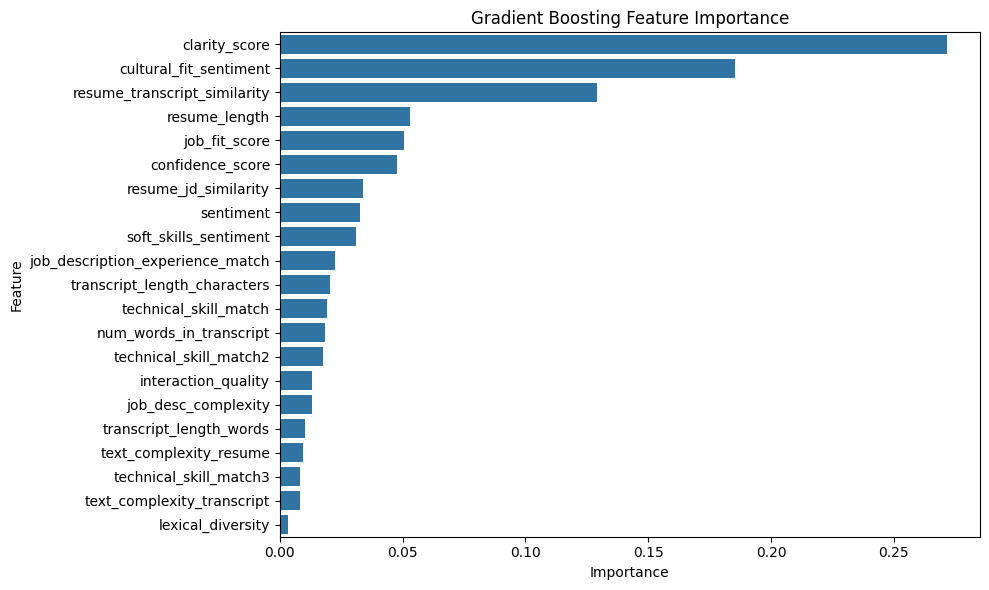


Top 5 most impactful features:
clarity_score: Importance = 0.2715
cultural_fit_sentiment: Importance = 0.1854
resume_transcript_similarity: Importance = 0.1293
resume_length: Importance = 0.0531
job_fit_score: Importance = 0.0505


In [148]:
# --- Gradient Boosting Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_impact_analysis)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_gb_features = gb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_gb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [150]:
from sklearn.ensemble import AdaBoostClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier(random_state=42)  # Default algorithm is SAMME.R

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best AdaBoost model
ada_boost_best = grid_search.best_estimator_

# Predictions
ada_boost_y_pred = ada_boost_best.predict(X_test)
ada_boost_y_proba = ada_boost_best.predict_proba(X_test)[:, 1]

# Metrics
ada_boost_accuracy = accuracy_score(y_test, ada_boost_y_pred)
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_y_proba)

# Display results
print(f"AdaBoost Accuracy: {ada_boost_accuracy * 100:.2f}%")
print(f"AdaBoost ROC AUC: {ada_boost_roc_auc:.4f}")

c:\Users\yalla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 87.87%
AdaBoost ROC AUC: 0.9598


In [151]:
# Error Analysis
ada_boost_y_pred = ada_boost_best.predict(X_test)  # Reuse predictions
adaboost_errors = X_test.copy()
adaboost_errors['True Label'] = y_test
adaboost_errors['Predicted Label'] = ada_boost_y_pred
adaboost_errors['Error'] = adaboost_errors['True Label'] != adaboost_errors['Predicted Label']

# Identify misclassified instances
misclassified_adaboost = adaboost_errors[adaboost_errors['Error'] == True]

# Total number of misclassified instances
misclassified_count = len(misclassified_adaboost)
print(f"\nTotal number of misclassified instances: {misclassified_count}")


Total number of misclassified instances: 77


In [155]:
# --- Impact Analysis for AdaBoost ---
try:
    adaboost_feature_importance = ada_boost_best.feature_importances_
    adaboost_impact_analysis = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': adaboost_feature_importance
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Displaying the impact analysis
    print("Impact Analysis (AdaBoost):")
    print(adaboost_impact_analysis)
except AttributeError:
    print("The AdaBoost model does not support feature importances for the current configuration.")


Impact Analysis (AdaBoost):
                             Feature  Importance
0             cultural_fit_sentiment    0.133333
1               resume_jd_similarity    0.093333
2       resume_transcript_similarity    0.086667
3                      job_fit_score    0.086667
4              technical_skill_match    0.060000
5                interaction_quality    0.053333
6                   confidence_score    0.053333
7             technical_skill_match2    0.053333
8                      resume_length    0.053333
9              soft_skills_sentiment    0.040000
10            text_complexity_resume    0.040000
11           transcript_length_words    0.033333
12  job_description_experience_match    0.026667
13                 lexical_diversity    0.026667
14               job_desc_complexity    0.026667
15                     clarity_score    0.026667
16        text_complexity_transcript    0.026667
17           num_words_in_transcript    0.026667
18            technical_skill_match3    0

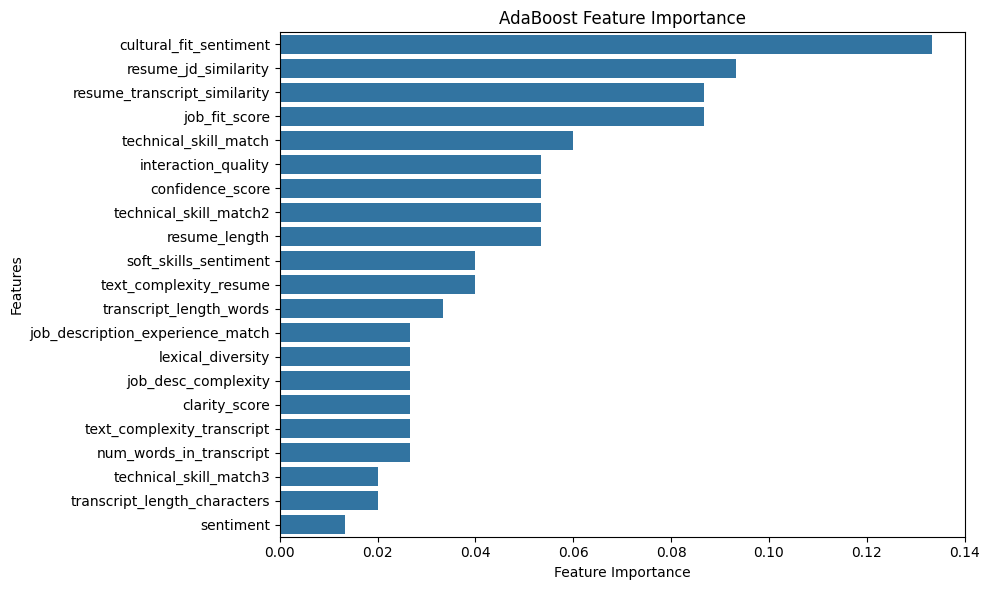


Top 5 most impactful features:
14. cultural_fit_sentiment: Importance = 0.1333
2. resume_jd_similarity: Importance = 0.0933
3. resume_transcript_similarity: Importance = 0.0867
15. job_fit_score: Importance = 0.0867
8. technical_skill_match: Importance = 0.0600


In [156]:
# --- AdaBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=adaboost_feature_importance_df)
plt.title('AdaBoost Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# --- Summary ---
top_adaboost_features = adaboost_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for idx, row in top_adaboost_features.iterrows():
    print(f"{idx + 1}. {row['Feature']}: Importance = {row['Importance']:.4f}")


In [157]:
#CatBoost
from catboost import CatBoostClassifier
# --- CatBoost with Hyperparameter Tuning ---
param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 150]
}

# Initializing CatBoost with silent mode
catboost = CatBoostClassifier(silent=True, random_state=42)

# Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,  # Display progress for debugging
    n_jobs=-1   # Utilize all processors for faster computation
)
grid_search.fit(X_train, y_train)

# Extracting the best model and evaluating it
catboost_best = grid_search.best_estimator_
catboost_y_pred = catboost_best.predict(X_test)
catboost_y_proba = catboost_best.predict_proba(X_test)[:, 1]

# Performance Metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_roc_auc = roc_auc_score(y_test, catboost_y_proba)

# Displaying Results
print(f"CatBoost Accuracy: {catboost_accuracy * 100:.2f}%")
print(f"CatBoost ROC AUC: {catboost_roc_auc:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CatBoost Accuracy: 88.19%
CatBoost ROC AUC: 0.9677


In [158]:
# --- Error Analysis for CatBoost ---
catboost_errors = X_test.copy()
catboost_errors['True Label'] = y_test
catboost_errors['Predicted Label'] = catboost_best.predict(X_test)
catboost_errors['Error'] = catboost_errors['True Label'] != catboost_errors['Predicted Label']

# Filtering misclassified instances
misclassified_catboost = catboost_errors[catboost_errors['Error']]

# Displaying Results
print(f"Misclassified Instances (CatBoost): {len(misclassified_catboost)}")



Misclassified Instances (CatBoost): 75


In [160]:
# Impact Analysis: CatBoost Feature Importance
catboost_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train.columns to align with feature importance
    'Importance': catboost_best.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importance
print("Impact Analysis (CatBoost):")
catboost_feature_importance_df


Impact Analysis (CatBoost):


,Feature,Importance
0,cultural_fit_sentiment,16.818076
1,resume_transcript_similarity,11.945302
2,clarity_score,9.169046
3,resume_length,6.238091
4,job_description_experience_match,5.923223
5,resume_jd_similarity,5.696498
6,technical_skill_match,5.479593
7,job_fit_score,5.038850
8,confidence_score,4.590942
9,soft_skills_sentiment,4.575385


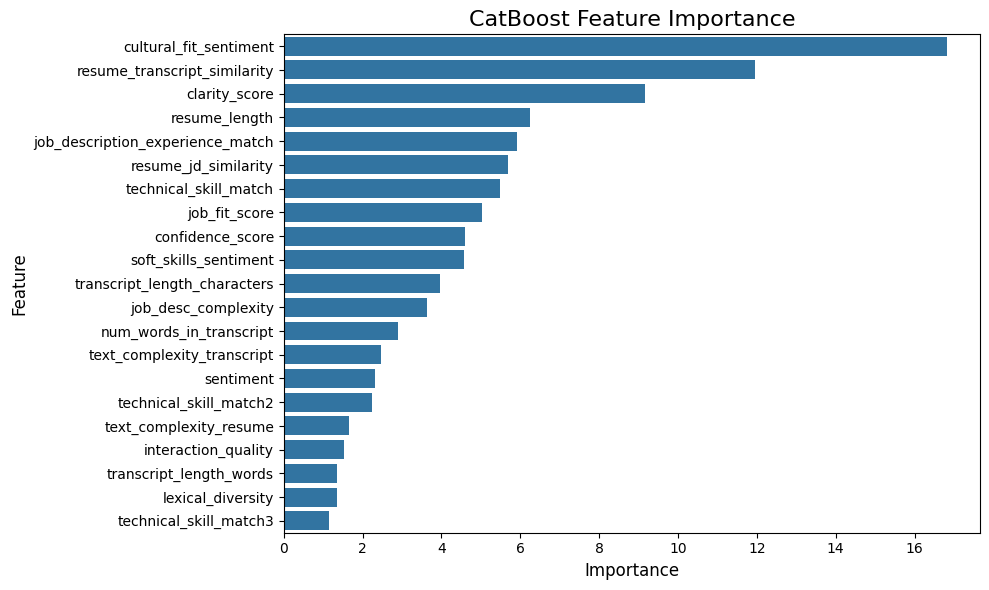


Top 5 most impactful features:
cultural_fit_sentiment: Importance = 16.8181
resume_transcript_similarity: Importance = 11.9453
clarity_score: Importance = 9.1690
resume_length: Importance = 6.2381
job_description_experience_match: Importance = 5.9232


In [161]:
# --- CatBoost Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance_df)
plt.title('CatBoost Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()  # Ensures the plot looks clean
plt.show()

# --- Summary ---
top_catboost_features = catboost_feature_importance_df.head(5)  # Top 5 features by importance

print("\nTop 5 most impactful features:")
for _, row in top_catboost_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [162]:
from sklearn.neural_network import MLPClassifier
# Neural Network (MLPClassifier) with Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# Define the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Utilize all processors for faster computation
    verbose=1   # Show progress
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model and predictions
mlp_best = grid_search.best_estimator_
mlp_y_pred = mlp_best.predict(X_test)

# Performance metrics
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_best.predict_proba(X_test)[:, 1])

# Output results
print(f"MLPClassifier Accuracy: {mlp_accuracy * 100:.2f}%")
print(f"MLPClassifier ROC AUC: {mlp_roc_auc:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLPClassifier Accuracy: 74.17%
MLPClassifier ROC AUC: 0.8281


In [164]:
# Error Analysis for MLPClassifier
mlp_errors = X_test.copy()
mlp_errors['True Label'] = y_test
mlp_errors['Predicted Label'] = mlp_y_pred  # Reuse predictions from earlier
mlp_errors['Error'] = mlp_errors['True Label'] != mlp_errors['Predicted Label']

# Extracting misclassified instances
misclassified_mlp = mlp_errors[mlp_errors['Error']]
print(f"Misclassified Instances (MLPClassifier):{len(misclassified_mlp)}")


Misclassified Instances (MLPClassifier):164


In [165]:
from sklearn.inspection import permutation_importance

# Permutation-based Feature Importance
mlp_perm_importance = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=42)

# Creating a DataFrame for Feature Importance
mlp_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mlp_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print("Impact Analysis (MLPClassifier):")
mlp_feature_importance_df


Impact Analysis (MLPClassifier):


,Feature,Importance
6,transcript_length_characters,0.286299
0,num_words_in_transcript,0.211496
17,interaction_quality,0.062677
5,transcript_length_words,0.055276
18,clarity_score,0.018583
11,resume_length,0.014488
16,job_desc_complexity,0.008504
15,confidence_score,0.003307
12,job_description_experience_match,0.001732
13,cultural_fit_sentiment,0.001417


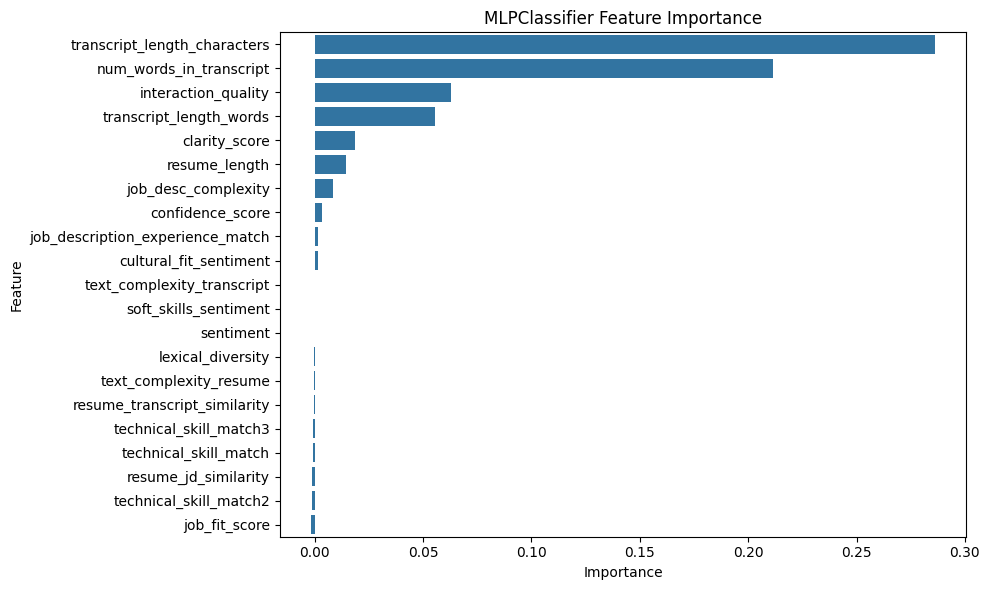


Top 5 most impactful features:
transcript_length_characters: Importance = 0.2863
num_words_in_transcript: Importance = 0.2115
interaction_quality: Importance = 0.0627
transcript_length_words: Importance = 0.0553
clarity_score: Importance = 0.0186


In [167]:
# --- MLPClassifier Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance_df)
plt.title('MLPClassifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_mlp_features = mlp_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_mlp_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Model Comparison Table:
                 Model  Accuracy (%)   ROC AUC
3              XGBoost     88.818898  0.967769
6             CatBoost     88.188976  0.967729
2        Random Forest     88.031496  0.965111
4    Gradient Boosting     88.031496  0.964029
5             AdaBoost     87.874016  0.959764
1        Decision Tree     85.354331  0.915703
0  Logistic Regression     81.574803  0.907831
7                  MLP     74.173228  0.828112


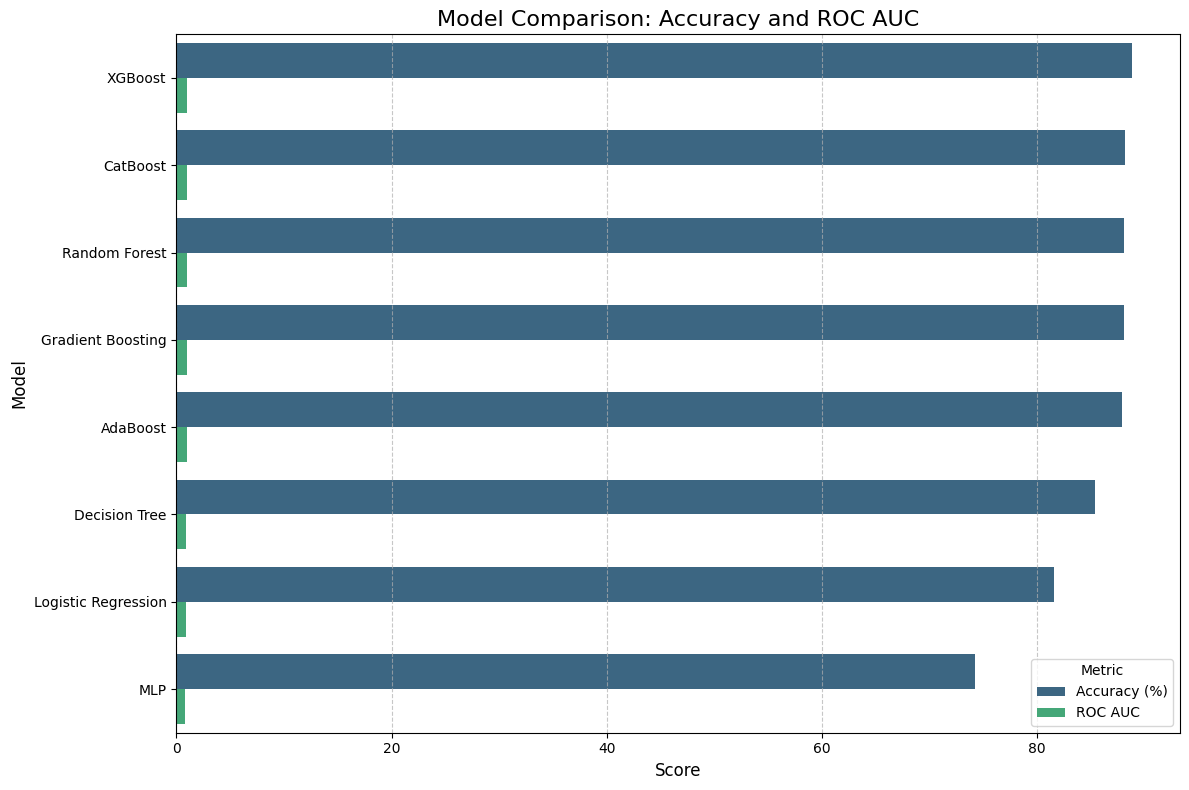


Summary of the Model Comparison:
1. The best-performing model based on Accuracy is: XGBoost with an Accuracy of 88.82%.
2. The best-performing model based on ROC AUC is: XGBoost with a ROC AUC score of 0.97.
3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.


In [173]:
# Define models and their respective accuracy and ROC AUC scores
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
    'Gradient Boosting', 'AdaBoost', 'CatBoost', 'MLP'
]

# Accuracy scores from the above calculations
accuracies = [
    log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, 
    gb_accuracy, ada_boost_accuracy, catboost_accuracy, mlp_accuracy
]

# ROC AUC scores from the above calculations
roc_auc_scores = [
    log_reg_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc, 
    gb_roc_auc, ada_boost_roc_auc, catboost_roc_auc, mlp_roc_auc
]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies_percent,
    'ROC AUC': roc_auc_scores
}).sort_values(by='Accuracy (%)', ascending=False)

# Display comparison DataFrame
print("Model Comparison Table:")
print(comparison_df)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df.melt(id_vars='Model', value_vars=['Accuracy (%)', 'ROC AUC']),
    x='value', y='Model', hue='variable', palette='viridis'
)
plt.title('Model Comparison: Accuracy and ROC AUC', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Metric', fontsize=10, loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary
best_accuracy_model = comparison_df.iloc[0]
best_auc_model = comparison_df.sort_values(by='ROC AUC', ascending=False).iloc[0]

print("\nSummary of the Model Comparison:")
print(f"1. The best-performing model based on Accuracy is: {best_accuracy_model['Model']} "
      f"with an Accuracy of {best_accuracy_model['Accuracy (%)']:.2f}%.")
print(f"2. The best-performing model based on ROC AUC is: {best_auc_model['Model']} "
      f"with a ROC AUC score of {best_auc_model['ROC AUC']:.2f}.")
print("3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.")


In [ ]:
#XGBOOST  is the best model in my analysis so now 

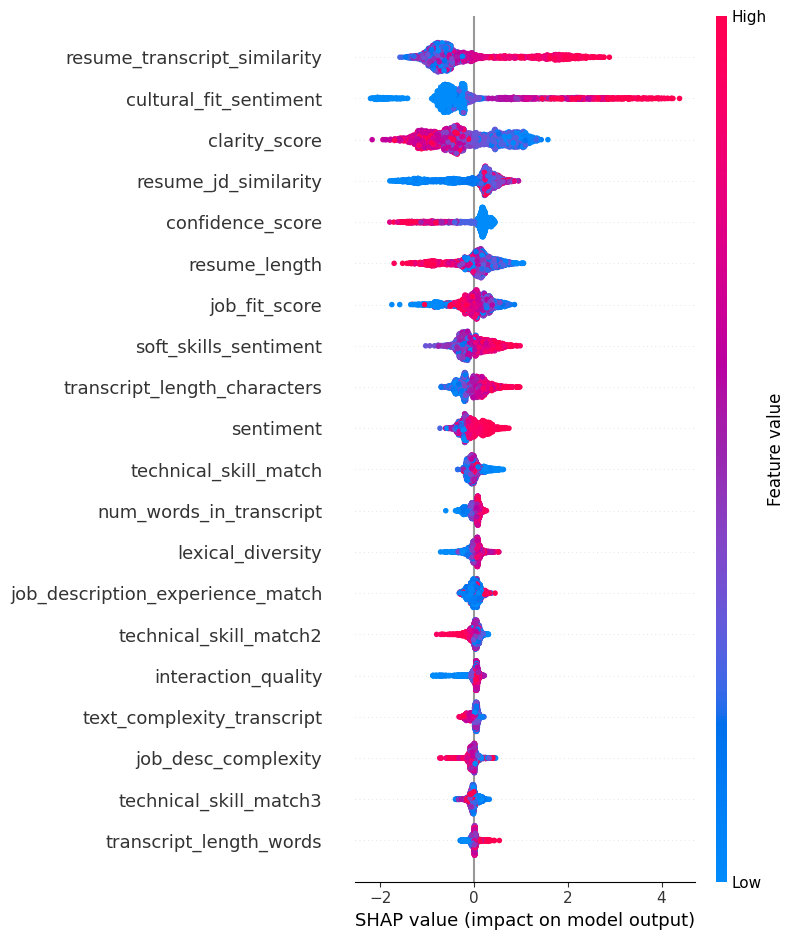

In [223]:
import shap

# Ensure you use the correct trained model, e.g., xgb_best from your tuning process
explainer = shap.Explainer(xgb_best, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)



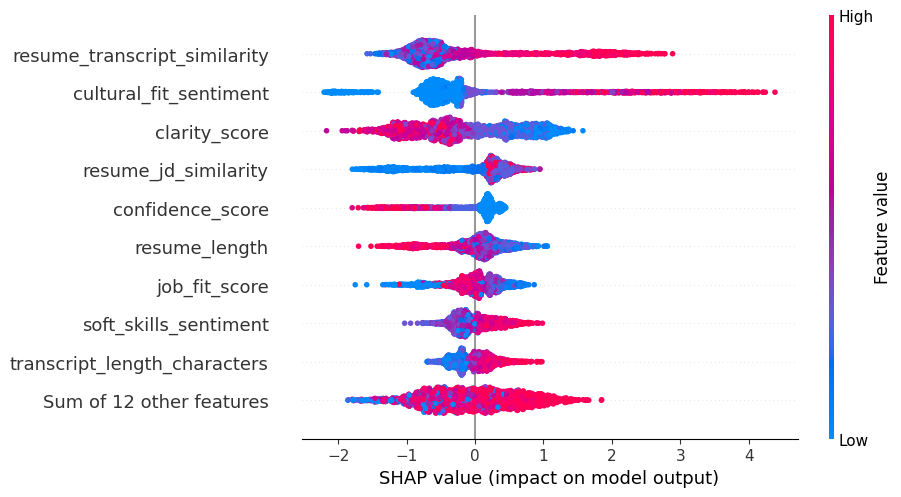

In [180]:
# Beeswarm plot for SHAP values
shap.plots.beeswarm(shap_values)


In [186]:
'''
1.resume_transcript_similarity
Impact:
High positive impact for higher values (red dots).
Low values (blue dots) slightly reduce the output.
Insight:
Candidates with resumes closely matching the transcript positively influence the model's predictions.

2. cultural_fit_sentiment
Impact:
High values (red) strongly increase the model output.
Low values (blue) reduce the output significantly.
Insight:
A positive sentiment toward cultural fit is a strong indicator for a higher model score.

3. clarity_score
Impact:
High clarity scores (red) generally boost the model output.
Lower clarity (blue) reduces the score but with some overlap.
Insight:
Clearer resumes or transcripts contribute positively to the outcome.

4. resume_jd_similarity
Impact:
High similarity values (red) slightly increase the model output.
Lower values (blue) show a small reduction in the score.
Insight:
Aligning resumes with job descriptions has a modest, consistent positive impact.

5. confidence_score
Impact:
Higher scores (red) moderately increase the output.
Low confidence (blue) tends to have a negative or neutral effect.
Insight:
Candidates showing confidence likely contribute positively to the predictions.

6. resume_length
Impact:
The impact is mixed but leans positive for longer resumes (red).
Shorter resumes (blue) show variability in their effect.
Insight:
Resume length has a moderate impact, depending on context.

7. job_fit_score
Impact:
Higher values (red) marginally boost the output.
Lower values (blue) reduce it slightly.
Insight:
A strong job fit is beneficial, but the impact is less pronounced compared to top features.

8. soft_skills_sentiment
Impact:
Higher sentiment (red) is linked with increased output.
Low sentiment (blue) has a minimal effect.
Insight:
Positive soft skills sentiment contributes to better predictions.

9. transcript_length_characters
Impact:
Higher character lengths (red) slightly increase the output.
Shorter lengths (blue) tend to reduce or have no impact.
Insight:
Longer transcripts have a small but positive influence.

10. Sum of 12 other features
Impact:
The cumulative impact is concentrated near 0, with occasional positive or negative effects.
Insight:
The combined influence of less significant features is minor compared to the top ones.

Summary
The top three features (resume_transcript_similarity, cultural_fit_sentiment, and clarity_score) have the most significant impact on predictions.
Features like resume_length, job_fit_score, and confidence_score have moderate influence.
Features such as transcript_length_characters and the sum of other features contribute minimally.'''


Feature-wise Insights (with impact based on value changes):
1. num_words_in_transcript:
   - **Negative impact**: Higher values decrease the output prediction.
   - **Impact Magnitude**: On average, the feature contributes 0.1014 to the model's output.
   - **Spread Observation**: A wider spread indicates higher variability in impact across instances. Features with more red or blue points at extremes have stronger influence when their values are high or low.

2. resume_jd_similarity:
   - **Negative impact**: Higher values decrease the output prediction.
   - **Impact Magnitude**: On average, the feature contributes 0.4697 to the model's output.
   - **Spread Observation**: A wider spread indicates higher variability in impact across instances. Features with more red or blue points at extremes have stronger influence when their values are high or low.

3. resume_transcript_similarity:
   - **Negative impact**: Higher values decrease the output prediction.
   - **Impact Magnitude**: On

In [195]:
base_value  = explainer.expected_value
print(f"Base Value: {base_value}")

Base Value: 0.415164574768107


In [196]:
shap_values_test = explainer(X_test)  



--- SHAP Waterfall Plot for Instance 1 ---


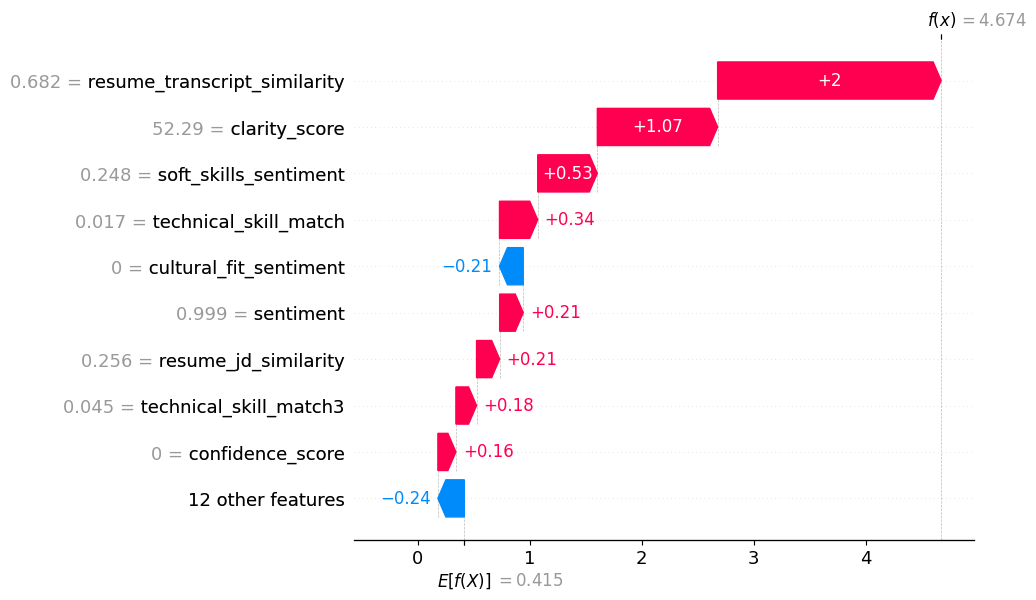


Summary:
Base Probability: 60.2326%
Predicted Probability: 99.0748%

Top Contributing Features:
  - resume_transcript_similarity: 1.9959 (increases prediction)
  - clarity_score: 1.0745 (increases prediction)
  - soft_skills_sentiment: 0.5323 (increases prediction)
  - technical_skill_match: 0.3414 (increases prediction)
  - cultural_fit_sentiment: -0.2122 (decreases prediction)

Feature Value Insights:
  - resume_transcript_similarity has a value of 0.6824, contributing 1.9959.
  - clarity_score has a value of 52.2900, contributing 1.0745.
  - soft_skills_sentiment has a value of 0.2480, contributing 0.5323.
  - technical_skill_match has a value of 0.0175, contributing 0.3414.
  - cultural_fit_sentiment has a value of 0.0000, contributing -0.2122.

--- SHAP Waterfall Plot for Instance 2 ---


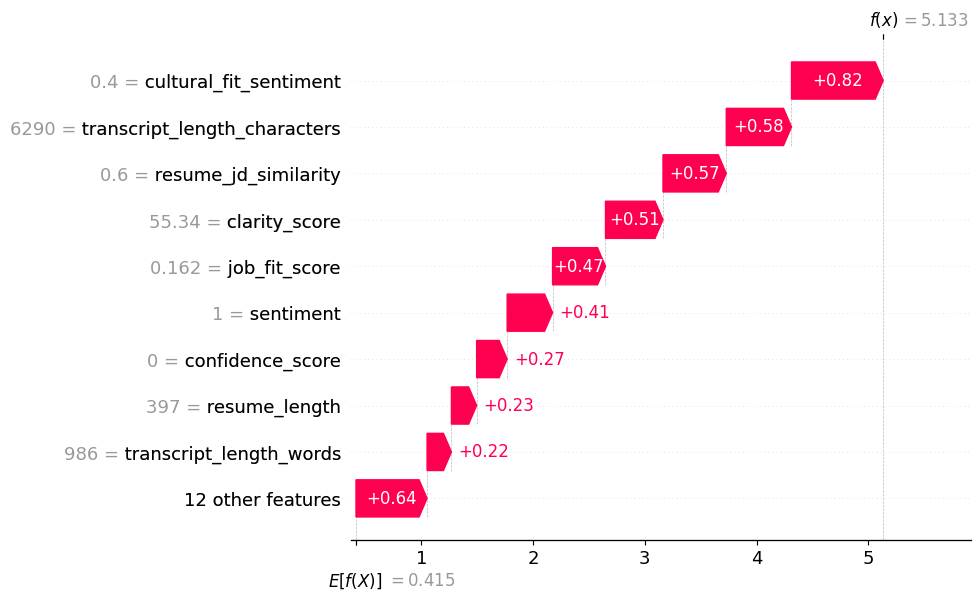


Summary:
Base Probability: 60.2326%
Predicted Probability: 99.4137%

Top Contributing Features:
  - cultural_fit_sentiment: 0.8207 (increases prediction)
  - transcript_length_characters: 0.5837 (increases prediction)
  - resume_jd_similarity: 0.5663 (increases prediction)
  - clarity_score: 0.5146 (increases prediction)
  - job_fit_score: 0.4736 (increases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 0.4000, contributing 0.8207.
  - transcript_length_characters has a value of 6290.0000, contributing 0.5837.
  - resume_jd_similarity has a value of 0.5999, contributing 0.5663.
  - clarity_score has a value of 55.3400, contributing 0.5146.
  - job_fit_score has a value of 0.1617, contributing 0.4736.

--- SHAP Waterfall Plot for Instance 3 ---


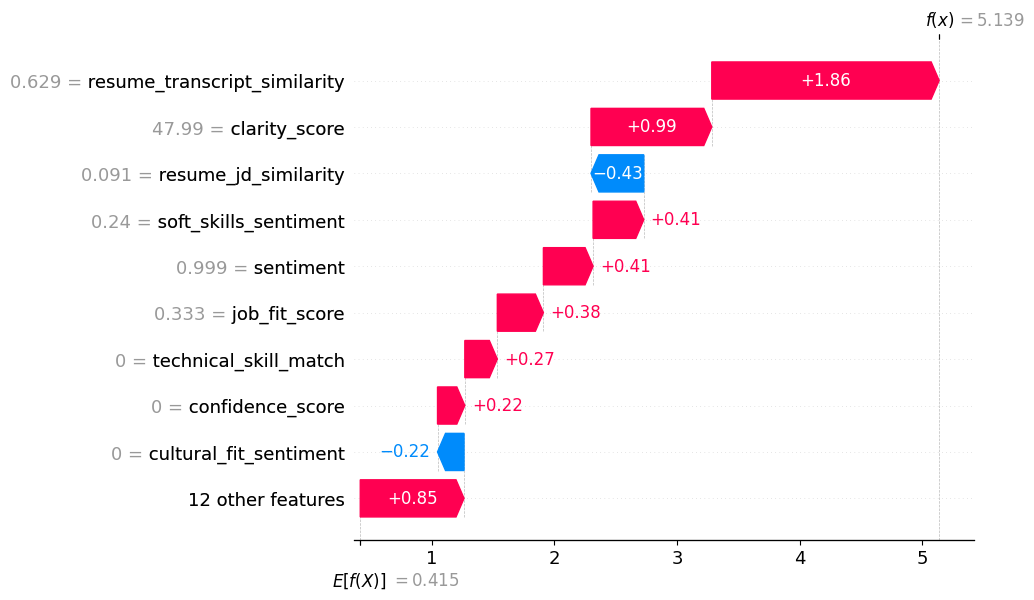


Summary:
Base Probability: 60.2326%
Predicted Probability: 99.4168%

Top Contributing Features:
  - resume_transcript_similarity: 1.8553 (increases prediction)
  - clarity_score: 0.9854 (increases prediction)
  - resume_jd_similarity: -0.4305 (decreases prediction)
  - soft_skills_sentiment: 0.4135 (increases prediction)
  - sentiment: 0.4055 (increases prediction)

Feature Value Insights:
  - resume_transcript_similarity has a value of 0.6285, contributing 1.8553.
  - clarity_score has a value of 47.9900, contributing 0.9854.
  - resume_jd_similarity has a value of 0.0913, contributing -0.4305.
  - soft_skills_sentiment has a value of 0.2404, contributing 0.4135.
  - sentiment has a value of 0.9994, contributing 0.4055.


In [216]:
# Iterate through the first 3 instances
for i in range(3):
    instance_index = i
    shap_value = shap_values_test[instance_index]
    
    # Generate the waterfall plot
    print(f"\n--- SHAP Waterfall Plot for Instance {instance_index + 1} ---")
    shap.plots.waterfall(shap_value)
    
    # Extract information for summary
    feature_contributions = shap_value.values
    base_value = shap_value.base_values 
    predicted_value = base_value + feature_contributions.sum() 
    feature_names = shap_value.feature_names
    top_features = sorted(zip(feature_names, feature_contributions), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Convert log-odds to probabilities
    base_probability = 1 / (1 + np.exp(-base_value))  
    predicted_probability = 1 / (1 + np.exp(-predicted_value)) 
    
    # Print summary
    print("\nSummary:")
    print(f"Base Probability: {base_probability:.4%}")
    print(f"Predicted Probability: {predicted_probability:.4%}")
    
    print("\nTop Contributing Features:")
    for feature, contribution in top_features:
        direction = "increases" if contribution > 0 else "decreases"
        print(f"  - {feature}: {contribution:.4f} ({direction} prediction)")
    
    #Feature value insight
    print("\nFeature Value Insights:")
    for feature, contribution in top_features:
        feature_index = feature_names.index(feature)
        feature_value = shap_value.data[feature_index]
        print(f"  - {feature} has a value of {feature_value:.4f}, contributing {contribution:.4f}.")


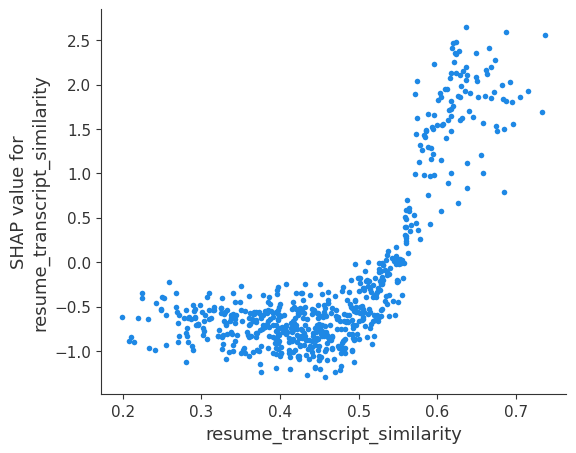

" \nIn this resume_transcript_similarity dependency plot, SHAP values show a sharp increase starting from a similarity score of 0.5.\nFrom 0.4 to 0.6, the SHAP values gradually transition from negative to positive, reflecting a turning point in the model's response.\nLower similarity scores negatively impact predictions, as indicated by SHAP values below 0.\nKey Insight: Higher resume_transcript_similarity values (above 0.6) positively influence the model’s output, with a stronger impact as similarity increases further.\n"

In [ ]:
# Dependency Plot Feature 1
features_to_plot = "resume_transcript_similarity" 
shap.dependence_plot(
    ind=features_to_plot, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)


''' 
In this resume_transcript_similarity dependency plot, SHAP values show a sharp increase starting from a similarity score of 0.5.
From 0.4 to 0.6, the SHAP values gradually transition from negative to positive, reflecting a turning point in the model's response.
Lower similarity scores negatively impact predictions, as indicated by SHAP values below 0.
Key Insight: Higher resume_transcript_similarity values (above 0.6) positively influence the model’s output, with a stronger impact as similarity increases further.
'''

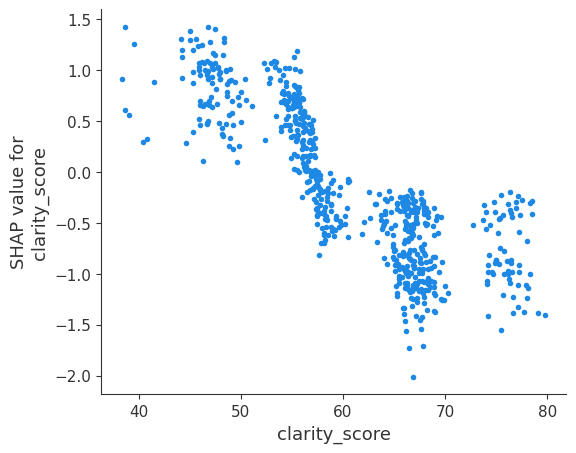

"' \nIn this clarity_score dependency plot, SHAP values gradually decrease as the clarity score increases.\nFrom 40 to 60, SHAP values transition from positive to near-zero, indicating diminishing positive impact.\nClarity scores above 60 show a consistently negative impact on predictions, with SHAP values dropping further as the clarity score reaches 80.\nKey Insight: Higher clarity scores negatively influence the model's output, while lower clarity scores contribute positively.\n"

In [229]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)

'''' 
In this clarity_score dependency plot, SHAP values gradually decrease as the clarity score increases.
From 40 to 60, SHAP values transition from positive to near-zero, indicating diminishing positive impact.
Clarity scores above 60 show a consistently negative impact on predictions, with SHAP values dropping further as the clarity score reaches 80.
Key Insight: Higher clarity scores negatively influence the model's output, while lower clarity scores contribute positively.
'''


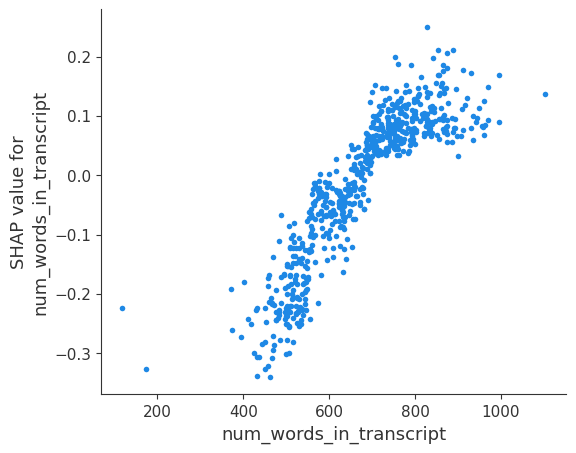

" In this num_words_in_transcript Dependency plot from 400 to 1000 it gradually increasing \n    As num_words_in_transcript increases, SHAP values generally become positive.\n    Shorter transcripts below 200 words have a negative impact on predictions.\n    Key Insight: More words in a transcript positively influence the model's output.\n"

In [227]:
# Dependency Plot for Feature 3
feature_name = "num_words_in_transcript"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values, 
    feature_names=X_test.columns,  
    interaction_index=None,  
    cmap=plt.cm.Reds  
)



''' In this num_words_in_transcript Dependency plot from 400 to 1000 it gradually increasing 
    As num_words_in_transcript increases, SHAP values generally become positive.
    Shorter transcripts below 200 words have a negative impact on predictions.
    Key Insight: More words in a transcript positively influence the model's output.
'''

In [231]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description', 'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'soft_skills_sentiment', 'resume_length',
       'job_description_experience_match', 'cultural_fit_sentiment',
       'job_fit_score', 'confidence_score', 'job_desc_complexity',
       'interaction_quality', 'clarity_score', 'text_complexity_transcript',
       'text_complexity_resume'],
      dtype='object')

In [230]:
from sklearn.inspection import PartialDependenceDisplay

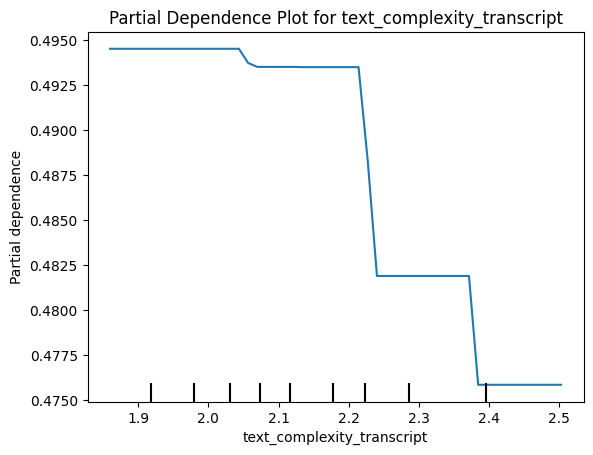

"'\nIn this technical_skill_match Partial Dependence plot, from 0.1 to 0.5, the model's output gradually increases.  \nAt lower values (0.1–0.2), the impact on the model's prediction is minimal, with partial dependence values around 0.480.  \nAs technical_skill_match increases to 0.3–0.4, the model's prediction shows a noticeable positive trend.  \nAt higher values (0.4–0.5), the impact stabilizes around 0.500, indicating strong alignment with positive predictions.  \n\nKey Insight: \nHigher technical skill matching positively contributes to the model's output, especially at higher alignment levels.  \n"

In [ ]:
#PartialDependence Plot for Feature
feature_name = "text_complexity_transcript"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,  
    kind="average" 
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


''''
In this text_complexity_transcript Partial Dependence plot:  
- The partial dependence remains stable at around 0.495 for text complexity values between 1.9 and 2.1.  
- A slight decline is observed between 2.1 and 2.2, followed by a sharp drop after 2.2.  
- Beyond 2.4, the curve flattens at a low point, around 0.475, indicating minimal influence.  

Key Insight: Higher text complexity in the transcript negatively impacts the model's output, with a significant decline after 2.2.  
 
'''

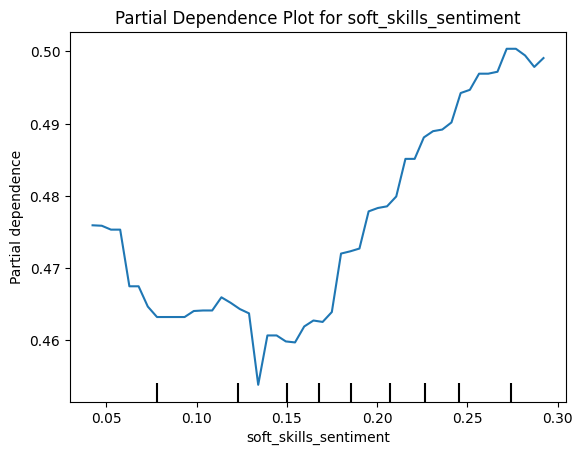

In [236]:
#PartialDependence Plot for Feature2
feature_name = "soft_skills_sentiment"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test,  
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,
    kind="average"  
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

'''
In this soft_skills_sentiment Partial Dependence plot:  
- At lower values (0.05–0.10), the partial dependence value decreases slightly, with the lowest point around 0.46 near 0.15.  
- Beyond 0.15, the curve begins to rise steadily, indicating a positive influence of soft_skills_sentiment on the model's output.  
- At higher values (0.25–0.30), the partial dependence stabilizes around 0.50, showing a strong positive impact.  

Key Insight: 
Higher sentiment scores for soft skills positively contribute to the model's predictions, especially above 0.15.  
'''


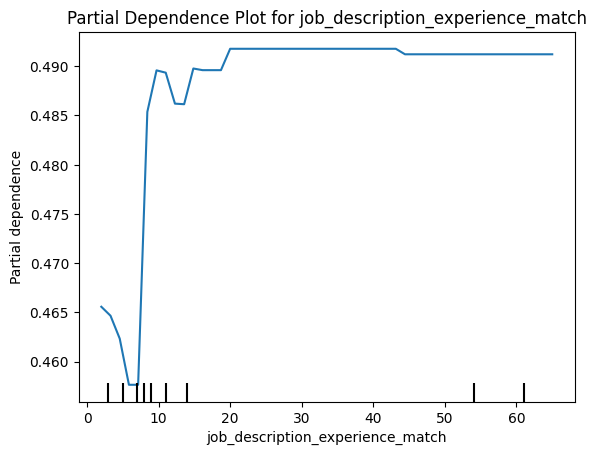

In [237]:
#PartialDependence Plot for Feature3
feature_name = "job_description_experience_match"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns, 
    grid_resolution=50,  
    kind="average'
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


'''
In this job_description_experience_match Partial Dependence plot:  
- For values near 0, the partial dependence value decreases slightly, reaching a low point around 0.460.  
- Between 5 and 10, the curve starts to rise sharply, indicating an increasing positive impact of experience match on the model's predictions.  
- Beyond 20, the partial dependence stabilizes around 0.490, showing a consistent positive influence.  

Key Insight: A higher job description experience match positively contributes to the model's output, with diminishing returns after 20.  

'''



--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


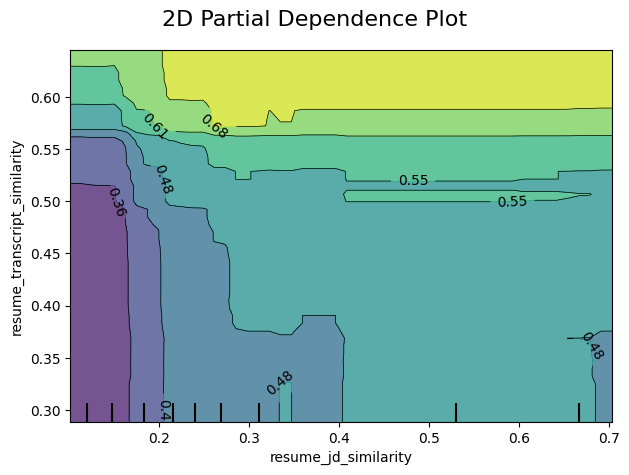

"\nIn this 2D Partial Dependence Plot:  \n- Lower values of both features like `resume_jd_similarity` < 0.3 and `resume_transcript_similarity` < 0.4 correspond to low model output 0.36.  \n- As `resume_jd_similarity` and `resume_transcript_similarity` increase, the model output improves, with higher values (~0.68) in the top-right region.  \n- The contour lines indicate regions of similar model predictions, with sharp increases in performance when both features are high.  \n\nKey Insight: \nStronger similarity between the resume and job description, as well as the resume and transcript, positively influences the model's predictions.  \n"

In [ ]:

features = [('resume_jd_similarity', 'resume_transcript_similarity')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_train,  
    features=features, 
    grid_resolution=50,
    kind='average',
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

'''the lighter color indicate the more probability 
   the darker color indicate the less probability
'''
'''
In this 2D Partial Dependence Plot:  
- Lower values of both features like `resume_jd_similarity` < 0.3 and `resume_transcript_similarity` < 0.4 correspond to low model output 0.36.  
- As `resume_jd_similarity` and `resume_transcript_similarity` increase, the model output improves, with higher values (~0.68) in the top-right region.  

Key Insight: 
Stronger similarity between the resume and job description, as well as the resume and transcript, positively influences the model's predictions.  
'''


--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


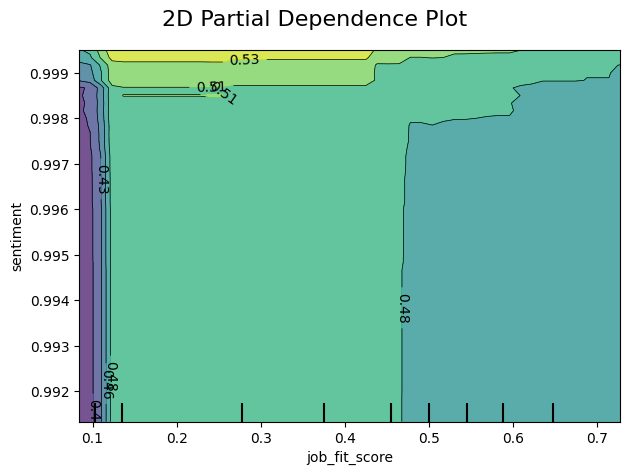

In [245]:

features = [('job_fit_score', 'sentiment')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_best, 
    X=X_train, 
    features=features,  
    grid_resolution=50, 
    kind='average', 
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

'''
In this 2D Partial Dependence Plot:  
- Low `job_fit_score` values (e.g., < 0.2) result in reduced model outputs (e.g., ~0.48 to ~0.53), irrespective of `sentiment`.  
- The model's output sharply increases for higher `job_fit_score` values (e.g., > 0.5), indicating significant influence from this feature.  
- For higher `sentiment` values, the effect of `job_fit_score` is amplified, especially in the region where both features are high.  

Key Insight: 
A higher job fit score, combined with a positive sentiment, greatly enhances the model's output predictions.  

'''


--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


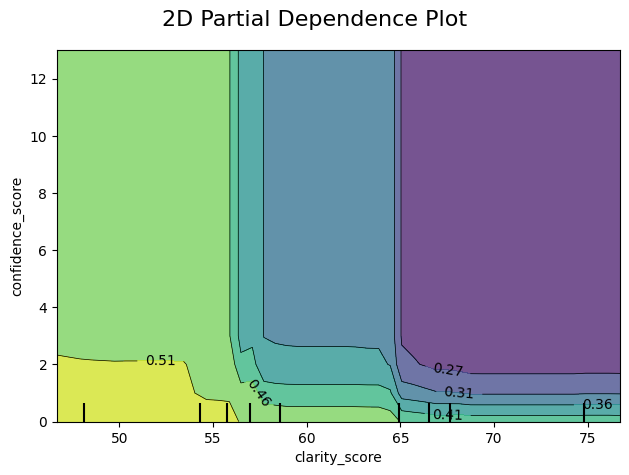

In [248]:

features = [('clarity_score', 'confidence_score')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_train,
    features=features, 
    grid_resolution=50, 
    kind='average', 
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

'''In this 2D Partial Dependence Plot:  
- Low `clarity_score` values (e.g., < 55) result in higher model outputs (~0.46 to ~0.51) regardless of `confidence_score`.  
- As `clarity_score` increases beyond 60, the model output sharply declines (~0.11 to ~0.36), especially for higher `confidence_score` values (> 4).  
- High `clarity_score` combined with low `confidence_score` has a moderate impact on the model output.  

Key Insight: 
Higher `clarity_score` negatively influences the model's output, especially when paired with high `confidence_score`.  
'''